### <img src="aspect_www_small.jpg" style="display: inline-block; width: 150px; padding-right:25px" align=left />

# Introduction to ASPECT v0.1
This is a demonstration notebook to show how to run ASPECT in a Jupyter notebook within a docker container. <br>
Instructions have been verified using the docker image tjhei/aspect-jupyter. See Appendix A. <br>
<p>Alternatively, with modifications you should be able to run this on a native install. </p>

<br>This notebook has been verified under:
* Python 3.5.3
* IPython 4.0.3
* Jupyter 5.0
* Jupyter widget extension (see Appendix B)
* matplotlib
* numpy
* tables
* docker (optional)

To complete all exercises, you will also need:
* ParaView

By completing this notebook, you will learn how to:
> Run ASPECT from the command line within a notebook environment.

> Understand the basic layout of a .prm file used to control ASPECT simulations.

> Plot simple output statistics and create files that are viewable in ParaView (and Visit).

> Explore the Nusselt-Rayleigh number relationship.

ASPECT is an open source community project. As such, we encourage contributions from the community to improve this code over time.

** Lead Developers: ** Wolfgang Bangerth, Timo Heister, Rene Gassm&ouml;ller, and Juliane Dannberg <br>
** Notebook Authors: ** Lorraine J. Hwang and Ian Rose with tutorial material from Juliane Dannberg<br> 
** aspect-devel mailing list: ** http://lists.geodynamics.org/cgi-bin/mailman/listinfo/aspect-devel <br>
** Subscribe to the CIG mantle convection (cig-mc) mailing list:** https://geodynamics.org/cig/about/mailing-lists/<br>
** github repository: ** https://github.com/geodynamics/aspect<br>
** website: ** aspect.dealii.org

Comments on this notebook can be sent to the mailing list or Lorraine:  
* aspect-devel@geodynamics.org
* lorraine@geodynamics.org
* Add an issue to the gitrepo:
        ljhwang/ASPECT-Jupyter
        
### Release Notes

v0.1  

Updates instructions for running in the CIG sandbox. 

## 1 Introduction to ASPECT

ASPECT — short for Advanced Solver for Problems in Earth’s ConvecTion — is a parallel finite element code intended to solve the equations that describe thermally driven convection with a focus on doing so in the context of convection
in the earth's mantle. The code builds on the deal.II library (https://www.dealii.org/), and, through deal.II, on Trilinos (see http://trilinos.org/) for parallel linear algebra and on p4est (see http://www.p4est.org/) for parallel mesh handling.

** Modularity **

ASPECT is designed to be an extensible code. It uses both a plug in architecture and a set of signals in which you can replace or extend certain parts of the code. The most common modifications made are changes to the material model, geometry, the direction and magnitude of gravity, and/or the initial and boundary conditions; and additions of postprocesors.  To make these this as a simple as possible, parts of the program have been separated into modules that communicate through interfaces. 

For more information, consult the manual, section <em> 6.0 Extending ASPECT</em>.

<img src="modularity1.png" style="display: inline-block;width: 475px; padding-right:25px; padding-left:25px"> <img src="modularity2.png" style="display: inline-block; width: 450px; padding-left:25px"/1>

Skip to Section 4 for information on:
> 4.1 Governing Equations

> 4.2 The .prm File

> 4.3 Default Values


## 2.0 Running ASPECT

### 2.1 I/O

ASPECT takes as input parameter files (*.prm) that completely describes your simulation. The parameter files determines the discretization, intial conditions, boundary conditions, material model, etc. See Appendix A in the manual for the complete list of run-time input parameters.
      
Example .prm files can be found in the cookbooks/ and benchmarks/ directory of the ASPECT distribution.


Simulation output will be store in the directory "output" or as specified in the input .prm file:

        set Output directory = output
        

### 2.2 Convection in a 2-D Box

Before launching the docker container, you should have created a working directory, e.g. 'ModelInput' on your local machine and copied to this directory the following files:
* convection-box.prm
* convection-box2.prm
* tutorial.prm

If you are running this from the CIG sandbox, then a directory called model_input with the needed files has already been created.
    
Review the file convection-box.prm to familiarize yourself with its contents and its input parameters:

>**Exercise**: How many Dimensions is this problem?       
   <blockquote> A: 2 specifies a two dimensional problem  </blockquote>

>**Exercise**: How long, in model time, will the simulation run?
    <blockquote> A: 0.5 years </blockquote>   

While in your working directory 'ModelInput', you then launched the docker container mapping your current working directory to model_input. 

Let's verify this first:

> **Step 1:** Check which directory you are currently in.

> **Step 2:** Print a list of its contents. 

**Tip:** "!" indicates a bash command.

** Shortcut:** $<$shift$>$$<$enter$>$ will execute your current cell.


In [1]:
!pwd
!ls

/home/dealii
aspect			   dealii-v8.5.0      libs	       TempFinal.jpg
ASPECT_Jupyter_v0.1.ipynb  dealii-v8.5.0-src  modularity1.png  TempInit.jpg
aspect_www_small.jpg	   demo.ipynb	      modularity2.png


Next:
> **Step 1:** Change your directory to 'aspect'.

> **Step 2:** Check whether your .prm file is in the directory model_input.

**Note:** To change directories you must import the python interpreter.

** Shortcut: ** You can always check the contents of your directory through the Jupyter notebook browser.

**Debug:** If model_input is not found, you most likely did not start you docker container in the directory you created it. In your terminal window, you should stop your container, prune it, and restart.

In [2]:
import os
os.chdir('aspect')
!ls model_input

convection-box2.prm  convection-box.prm  tutorial.prm


### 2.3 Executing ASPECT

Run ASPECT by calling the code specifing the input parameter file.  

The exectable is located one directory above your location. Always make sure your paths are correct relative to your current working directory.

When you start ASPECT, the code will print information about your run:  
> **Exercise:** What version number are you running?

> **Exercise:** Are you running in debug or optimized mode?

> **Exercise:** How many mpi processes are running?

> **Exercise:** Which solver are you using - Trilinos or PETSc?

The code will run in a scrollable window.  Scroll to monitor code progress and eventually to the end of the screen output. 

**Tip:** You may save this information along with this entire notebook any time by selecting from the toolbar: File > Download as > (option)

**Tip:** In [$*$] indicates that the code is running.  When finished, the '$*$' will be replaced by a number.

In [3]:
!./aspect model_input/convection-box.prm

--------------------------------------------------------------------------
[[47071,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: ff302707e8b2

Another transport will be used instead, although this may result in
lower performance.
--------------------------------------------------------------------------
-----------------------------------------------------------------------------
-- This is ASPECT, the Advanced Solver for Problems in Earth's ConvecTion.
--     . version 2.0.0-pre
--     . running in DEBUG mode
--     . running with 1 MPI process
--     . using Trilinos
-----------------------------------------------------------------------------

Number of active cells: 256 (on 5 levels)
Number of degrees of freedom: 3,556 (2,178+289+1,089)

*** Timestep 0:  t=0 seconds
   Solving temperature system... 0 iterations.
   Rebuilding Stokes preconditioner...
   Solving Stokes syst

   Solving Stokes system... 22+0 iterations.

   Postprocessing:
     RMS, max velocity:                  70.2 m/s, 104 m/s
     Temperature min/avg/max:            0 K, 0.495 K, 1 K
     Heat fluxes through boundary parts: 0.001206 W, 0.000121 W, -2.209 W, 2.598 W

*** Timestep 21:  t=0.0296485 seconds
   Solving temperature system... 13 iterations.
   Solving Stokes system... 22+0 iterations.

   Postprocessing:
     RMS, max velocity:                  71.7 m/s, 106 m/s
     Temperature min/avg/max:            0 K, 0.4945 K, 1 K
     Heat fluxes through boundary parts: 0.001431 W, 0.0001379 W, -2.338 W, 2.734 W

*** Timestep 22:  t=0.0299435 seconds
   Solving temperature system... 13 iterations.
   Solving Stokes system... 22+0 iterations.

   Postprocessing:
     RMS, max velocity:                  73 m/s, 108 m/s
     Temperature min/avg/max:            0 K, 0.4939 K, 1 K
     Heat fluxes through boundary parts: 0.001697 W, 0.0001552 W, -2.472 W, 2.869 W

*** Timestep 23:  t=0.030

   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  64.8 m/s, 101 m/s
     Temperature min/avg/max:            0 K, 0.4761 K, 1 K
     Heat fluxes through boundary parts: 0.02109 W, 0.0003214 W, -5.01 W, 4.453 W

*** Timestep 44:  t=0.036164 seconds
   Solving temperature system... 10 iterations.
   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  63.5 m/s, 99.4 m/s
     Temperature min/avg/max:            0 K, 0.4752 K, 1 K
     Heat fluxes through boundary parts: 0.02207 W, 0.0002842 W, -5.049 W, 4.452 W

*** Timestep 45:  t=0.0364783 seconds
   Solving temperature system... 10 iterations.
   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  62.2 m/s, 97.6 m/s
     Temperature min/avg/max:            0 K, 0.4744 K, 1 K
     Heat fluxes through boundary parts: 0.02293 W, 0.0002393 W, -5.077 W, 4.446 W

*** Timestep 46:  t=0.03

   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  42.7 m/s, 68.6 m/s
     Temperature min/avg/max:            0 K, 0.4679 K, 1 K
     Heat fluxes through boundary parts: 0.01824 W, -0.001083 W, -4.126 W, 3.712 W

*** Timestep 67:  t=0.0450776 seconds
   Solving temperature system... 11 iterations.
   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  42.4 m/s, 68.1 m/s
     Temperature min/avg/max:            0 K, 0.4681 K, 1 K
     Heat fluxes through boundary parts: 0.01775 W, -0.001087 W, -4.057 W, 3.673 W

*** Timestep 68:  t=0.0455362 seconds
   Solving temperature system... 11 iterations.
   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  42.2 m/s, 67.7 m/s
     Temperature min/avg/max:            0 K, 0.4684 K, 1 K
     Heat fluxes through boundary parts: 0.01729 W, -0.001084 W, -3.99 W, 3.636 W

*** Timestep 69:  t=0.

     RMS, max velocity:                  47.9 m/s, 74.1 m/s
     Temperature min/avg/max:            0 K, 0.4762 K, 1 K
     Heat fluxes through boundary parts: 0.01387 W, -0.0005707 W, -3.369 W, 3.336 W

*** Timestep 90:  t=0.0554738 seconds
   Solving temperature system... 11 iterations.
   Solving Stokes system... 19+0 iterations.

   Postprocessing:
     RMS, max velocity:                  48.4 m/s, 74.7 m/s
     Temperature min/avg/max:            0 K, 0.4764 K, 1 K
     Heat fluxes through boundary parts: 0.0139 W, -0.0005492 W, -3.374 W, 3.343 W

*** Timestep 91:  t=0.0558917 seconds
   Solving temperature system... 11 iterations.
   Solving Stokes system... 19+0 iterations.

   Postprocessing:
     RMS, max velocity:                  48.8 m/s, 75.4 m/s
     Temperature min/avg/max:            0 K, 0.4767 K, 1 K
     Heat fluxes through boundary parts: 0.01395 W, -0.0005289 W, -3.381 W, 3.352 W

*** Timestep 92:  t=0.0563061 seconds
   Solving temperature system... 11 iterations

*** Timestep 110:  t=0.0633319 seconds
   Solving temperature system... 10 iterations.
   Solving Stokes system... 19+0 iterations.

   Postprocessing:
     RMS, max velocity:                  53.9 m/s, 83.1 m/s
     Temperature min/avg/max:            0 K, 0.4786 K, 1 K
     Heat fluxes through boundary parts: 0.0158 W, -0.0003433 W, -3.714 W, 3.643 W

*** Timestep 111:  t=0.0637079 seconds
   Solving temperature system... 10 iterations.
   Solving Stokes system... 19+0 iterations.

   Postprocessing:
     RMS, max velocity:                  53.9 m/s, 83.2 m/s
     Temperature min/avg/max:            0 K, 0.4785 K, 1 K
     Heat fluxes through boundary parts: 0.01592 W, -0.0003432 W, -3.733 W, 3.657 W

*** Timestep 112:  t=0.0640834 seconds
   Solving temperature system... 10 iterations.
   Solving Stokes system... 19+0 iterations.

   Postprocessing:
     RMS, max velocity:                  54 m/s, 83.3 m/s
     Temperature min/avg/max:            0 K, 0.4785 K, 1 K
     Heat fluxes 

   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.7 m/s, 80.7 m/s
     Temperature min/avg/max:            0 K, 0.4772 K, 1 K
     Heat fluxes through boundary parts: 0.01762 W, -0.0004655 W, -3.913 W, 3.757 W

*** Timestep 134:  t=0.0724199 seconds
   Solving temperature system... 10 iterations.
   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.6 m/s, 80.5 m/s
     Temperature min/avg/max:            0 K, 0.4772 K, 1 K
     Heat fluxes through boundary parts: 0.01762 W, -0.0004723 W, -3.911 W, 3.753 W

*** Timestep 135:  t=0.072808 seconds
   Solving temperature system... 10 iterations.
   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.4 m/s, 80.3 m/s
     Temperature min/avg/max:            0 K, 0.4771 K, 1 K
     Heat fluxes through boundary parts: 0.01762 W, -0.0004789 W, -3.908 W, 3.749 W

*** Timestep 136:

   Solving temperature system... 9 iterations.
   Solving Stokes system... 17+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50 m/s, 78 m/s
     Temperature min/avg/max:            0 K, 0.4778 K, 1 K
     Heat fluxes through boundary parts: 0.01678 W, -0.0005327 W, -3.767 W, 3.651 W

*** Timestep 157:  t=0.0815285 seconds
   Solving temperature system... 9 iterations.
   Solving Stokes system... 17+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50 m/s, 78 m/s
     Temperature min/avg/max:            0 K, 0.4778 K, 1 K
     Heat fluxes through boundary parts: 0.01674 W, -0.0005314 W, -3.761 W, 3.648 W

*** Timestep 158:  t=0.0819288 seconds
   Solving temperature system... 9 iterations.
   Solving Stokes system... 17+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50 m/s, 78 m/s
     Temperature min/avg/max:            0 K, 0.4779 K, 1 K
     Heat fluxes through boundary parts: 0.01671 W, -0.0005298 W, -3

     RMS, max velocity:                  51 m/s, 79.3 m/s
     Temperature min/avg/max:            0 K, 0.4791 K, 1 K
     Heat fluxes through boundary parts: 0.0165 W, -0.0004758 W, -3.718 W, 3.641 W
     Writing graphical output:           output/solution/solution-00009

*** Timestep 180:  t=0.0906718 seconds
   Solving temperature system... 9 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51 m/s, 79.4 m/s
     Temperature min/avg/max:            0 K, 0.4792 K, 1 K
     Heat fluxes through boundary parts: 0.01652 W, -0.0004736 W, -3.72 W, 3.643 W

*** Timestep 181:  t=0.0910652 seconds
   Solving temperature system... 9 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51 m/s, 79.5 m/s
     Temperature min/avg/max:            0 K, 0.4792 K, 1 K
     Heat fluxes through boundary parts: 0.01653 W, -0.0004715 W, -3.721 W, 3.644 W

*** Timestep 182:  

   Solving temperature system... 7 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.4 m/s, 80 m/s
     Temperature min/avg/max:            0 K, 0.4796 K, 1 K
     Heat fluxes through boundary parts: 0.01688 W, -0.0004581 W, -3.766 W, 3.68 W

*** Timestep 203:  t=0.0996684 seconds
   Solving temperature system... 8 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.4 m/s, 80 m/s
     Temperature min/avg/max:            0 K, 0.4796 K, 1 K
     Heat fluxes through boundary parts: 0.01689 W, -0.0004586 W, -3.767 W, 3.681 W

*** Timestep 204:  t=0.100059 seconds
   Solving temperature system... 8 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.4 m/s, 80 m/s
     Temperature min/avg/max:            0 K, 0.4796 K, 1 K
     Heat fluxes through boundary parts: 0.0169 W, -0.0004592 W,

   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51 m/s, 79.6 m/s
     Temperature min/avg/max:            0 K, 0.4797 K, 1 K
     Heat fluxes through boundary parts: 0.01697 W, -0.0004739 W, -3.768 W, 3.682 W

*** Timestep 226:  t=0.108667 seconds
   Solving temperature system... 8 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51 m/s, 79.6 m/s
     Temperature min/avg/max:            0 K, 0.4797 K, 1 K
     Heat fluxes through boundary parts: 0.01697 W, -0.0004743 W, -3.767 W, 3.681 W

*** Timestep 227:  t=0.109059 seconds
   Solving temperature system... 8 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51 m/s, 79.6 m/s
     Temperature min/avg/max:            0 K, 0.4797 K, 1 K
     Heat fluxes through boundary parts: 0.01697 W, -0.0004747 W, -3.766 W, 3.68 W

*** Timestep 228:  t=0.1094

   Solving Stokes system... 14+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51 m/s, 79.5 m/s
     Temperature min/avg/max:            0 K, 0.48 K, 1 K
     Heat fluxes through boundary parts: 0.01689 W, -0.0004729 W, -3.749 W, 3.672 W

*** Timestep 250:  t=0.118094 seconds
   Solving temperature system... 8 iterations.
   Solving Stokes system... 14+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51 m/s, 79.5 m/s
     Temperature min/avg/max:            0 K, 0.4801 K, 1 K
     Heat fluxes through boundary parts: 0.01689 W, -0.0004726 W, -3.749 W, 3.672 W

*** Timestep 251:  t=0.118486 seconds
   Solving temperature system... 8 iterations.
   Solving Stokes system... 14+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51 m/s, 79.5 m/s
     Temperature min/avg/max:            0 K, 0.4801 K, 1 K
     Heat fluxes through boundary parts: 0.01688 W, -0.0004722 W, -3.748 W, 3.672 W

*** Timestep 252:  t=0.11887

   Solving Stokes system... 12+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4803 K, 1 K
     Heat fluxes through boundary parts: 0.01691 W, -0.0004657 W, -3.749 W, 3.676 W

*** Timestep 273:  t=0.127115 seconds
   Solving temperature system... 7 iterations.
   Solving Stokes system... 13+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4803 K, 1 K
     Heat fluxes through boundary parts: 0.01691 W, -0.0004656 W, -3.749 W, 3.676 W

*** Timestep 274:  t=0.127506 seconds
   Solving temperature system... 7 iterations.
   Solving Stokes system... 13+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4803 K, 1 K
     Heat fluxes through boundary parts: 0.01692 W, -0.0004654 W, -3.749 W, 3.677 W

*** Timestep 275:  t

     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4805 K, 1 K
     Heat fluxes through boundary parts: 0.01696 W, -0.0004652 W, -3.752 W, 3.68 W

*** Timestep 296:  t=0.136123 seconds
   Solving temperature system... 7 iterations.
   Solving Stokes system... 11+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4805 K, 1 K
     Heat fluxes through boundary parts: 0.01696 W, -0.0004652 W, -3.752 W, 3.68 W

*** Timestep 297:  t=0.136514 seconds
   Solving temperature system... 7 iterations.
   Solving Stokes system... 11+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4805 K, 1 K
     Heat fluxes through boundary parts: 0.01696 W, -0.0004653 W, -3.752 W, 3.68 W

*** Timestep 298:  t=0.136906 seconds
   Solving temperature system... 7 iterations.
   

   Solving temperature system... 6 iterations.
   Solving Stokes system... 10+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4805 K, 1 K
     Heat fluxes through boundary parts: 0.01697 W, -0.0004659 W, -3.751 W, 3.68 W

*** Timestep 316:  t=0.143957 seconds
   Solving temperature system... 6 iterations.
   Solving Stokes system... 10+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4806 K, 1 K
     Heat fluxes through boundary parts: 0.01697 W, -0.0004659 W, -3.751 W, 3.68 W

*** Timestep 317:  t=0.144349 seconds
   Solving temperature system... 6 iterations.
   Solving Stokes system... 10+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4806 K, 1 K
     Heat fluxes through boundary parts: 0.01697 W, -0.00046

   Solving temperature system... 6 iterations.
   Solving Stokes system... 10+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4807 K, 1 K
     Heat fluxes through boundary parts: 0.01697 W, -0.0004649 W, -3.748 W, 3.679 W

*** Timestep 340:  t=0.153361 seconds
   Solving temperature system... 6 iterations.
   Solving Stokes system... 10+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4807 K, 1 K
     Heat fluxes through boundary parts: 0.01697 W, -0.0004648 W, -3.748 W, 3.679 W

*** Timestep 341:  t=0.153752 seconds
   Solving temperature system... 6 iterations.
   Solving Stokes system... 10+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.7 m/s
     Temperature min/avg/max:            0 K, 0.4807 K, 1 K
     Heat fluxes through boundary parts: 0.01697 W, -0.000

   Solving temperature system... 5 iterations.
   Solving Stokes system... 9+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4807 K, 1 K
     Heat fluxes through boundary parts: 0.01698 W, -0.0004638 W, -3.748 W, 3.68 W

*** Timestep 364:  t=0.162761 seconds
   Solving temperature system... 5 iterations.
   Solving Stokes system... 9+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4807 K, 1 K
     Heat fluxes through boundary parts: 0.01698 W, -0.0004638 W, -3.748 W, 3.68 W

*** Timestep 365:  t=0.163152 seconds
   Solving temperature system... 5 iterations.
   Solving Stokes system... 9+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4807 K, 1 K
     Heat fluxes through boundary parts: 0.01698 W, -0.0004638 

   Solving temperature system... 5 iterations.
   Solving Stokes system... 8+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4808 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.0004636 W, -3.748 W, 3.681 W

*** Timestep 387:  t=0.171768 seconds
   Solving temperature system... 5 iterations.
   Solving Stokes system... 8+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4808 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.0004636 W, -3.748 W, 3.681 W

*** Timestep 388:  t=0.172159 seconds
   Solving temperature system... 5 iterations.
   Solving Stokes system... 8+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4808 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.000463

   Solving Stokes system... 7+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4808 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.0004634 W, -3.748 W, 3.681 W

*** Timestep 407:  t=0.1796 seconds
   Solving temperature system... 4 iterations.
   Solving Stokes system... 8+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4808 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.0004634 W, -3.748 W, 3.681 W

*** Timestep 408:  t=0.179991 seconds
   Solving temperature system... 4 iterations.
   Solving Stokes system... 7+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4808 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.0004634 W, -3.748 W, 3.681 W

*** Timestep 409:  t=0.18

   Solving temperature system... 5 iterations.
   Solving Stokes system... 6+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.0004631 W, -3.747 W, 3.681 W

*** Timestep 431:  t=0.188997 seconds
   Solving temperature system... 5 iterations.
   Solving Stokes system... 6+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.0004631 W, -3.747 W, 3.681 W

*** Timestep 432:  t=0.189389 seconds
   Solving temperature system... 5 iterations.
   Solving Stokes system... 6+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.000463

   Solving Stokes system... 6+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.0004629 W, -3.747 W, 3.682 W

*** Timestep 454:  t=0.198003 seconds
   Solving temperature system... 4 iterations.
   Solving Stokes system... 6+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.0004629 W, -3.747 W, 3.682 W

*** Timestep 455:  t=0.198394 seconds
   Solving temperature system... 4 iterations.
   Solving Stokes system... 6+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.01699 W, -0.0004629 W, -3.747 W, 3.682 W

*** Timestep 456:  t=0.

   Solving Stokes system... 6+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004627 W, -3.747 W, 3.682 W

*** Timestep 478:  t=0.2074 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004627 W, -3.747 W, 3.682 W

*** Timestep 479:  t=0.207791 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 6+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004627 W, -3.747 W, 3.682 W

*** Timestep 480:  t=0.208183 s

   Solving temperature system... 4 iterations.
   Solving Stokes system... 5+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004626 W, -3.747 W, 3.682 W

*** Timestep 503:  t=0.217188 seconds
   Solving temperature system... 4 iterations.
   Solving Stokes system... 5+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004626 W, -3.747 W, 3.682 W

*** Timestep 504:  t=0.217579 seconds
   Solving temperature system... 4 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004626 W, -

   Solving temperature system... 3 iterations.
   Solving Stokes system... 6+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004625 W, -3.747 W, 3.682 W

*** Timestep 527:  t=0.226584 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004625 W, -3.747 W, 3.682 W

*** Timestep 528:  t=0.226976 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4809 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004625 W, -

   Solving temperature system... 3 iterations.
   Solving Stokes system... 5+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004625 W, -3.747 W, 3.682 W

*** Timestep 551:  t=0.23598 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004625 W, -3.747 W, 3.682 W

*** Timestep 552:  t=0.236372 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004625 W, -3.74

     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004624 W, -3.747 W, 3.682 W

*** Timestep 575:  t=0.245376 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004624 W, -3.747 W, 3.682 W

*** Timestep 576:  t=0.245768 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 5+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004624 W, -3.747 W, 3.682 W

*** Timestep 577:  t=0.246159 seconds
   Solving temperature system... 3 iterations.
   Solving 

*** Timestep 598:  t=0.254381 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004624 W, -3.747 W, 3.682 W

*** Timestep 599:  t=0.254772 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004624 W, -3.747 W, 3.682 W

*** Timestep 600:  t=0.255164 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 5+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through bound

   Solving temperature system... 3 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004624 W, -3.747 W, 3.682 W

*** Timestep 619:  t=0.262602 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 5+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004624 W, -3.747 W, 3.682 W

*** Timestep 620:  t=0.262994 seconds
   Solving temperature system... 3 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004624 W, -3.7

   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 643:  t=0.271998 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 644:  t=0.272389 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 645:  t=0.272781 se

   Solving temperature system... 2 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 668:  t=0.281785 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 669:  t=0.282177 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.7

   Solving temperature system... 2 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 692:  t=0.291181 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 693:  t=0.291573 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.7

   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 712:  t=0.299011 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 713:  t=0.299402 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 714:  t=0.299794 se

     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 735:  t=0.308015 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 5+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 736:  t=0.308407 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 737:  t=0.308798 seconds
   Solving temperature system... 2 iterations.
   Solving 

*** Timestep 758:  t=0.317019 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 759:  t=0.317411 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 760:  t=0.317802 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through bound

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 783:  t=0.326806 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 784:  t=0.327198 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.7

   Solving temperature system... 2 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 803:  t=0.334636 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 804:  t=0.335028 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.7

     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 827:  t=0.344032 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 828:  t=0.344423 seconds
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 829:  t=0.344815 seconds
   Solving temperature system... 1 iterations.
   Solving 

   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 852:  t=0.353819 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 853:  t=0.35421 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.74

     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 876:  t=0.363215 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 877:  t=0.363606 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 878:  t=0.363998 seconds
   Solving temperature system... 1 iterations.
   Solving 

   Solving temperature system... 1 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 900:  t=0.37261 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W



+---------------------------------------------+------------+------------+
| Total wallclock time elapsed since start    |      34.4s |            |
|                                             |            |            |
| Section                         | no. calls |  wall time | % of total |
+---------------------------------+----

   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W
     Writing graphical output:           output/solution/solution-00038

*** Timestep 920:  t=0.38044 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 921:  t=0.380831 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1

   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 945:  t=0.390227 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W
     Writing graphical output:           output/solution/solution-00039

*** Timestep 946:  t=0.390619 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 

     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 969:  t=0.399623 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 970:  t=0.400014 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W
     Writing graphical output:           output/solution/solution-00040

*** Timestep 971:  t=0.4

*** Timestep 992:  t=0.408627 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 993:  t=0.409018 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 994:  t=0.40941 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through bounda

   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1013:  t=0.416848 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1014:  t=0.41724 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.

   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1037:  t=0.426244 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1038:  t=0.426635 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1039:  t=0.427027

   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1062:  t=0.436031 seconds
   Solving temperature system... 0 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1063:  t=0.436422 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3

*** Timestep 1086:  t=0.445427 seconds
   Solving temperature system... 0 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1087:  t=0.445818 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1088:  t=0.44621 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through bou

   Solving temperature system... 0 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1107:  t=0.453648 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1108:  t=0.454039 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3

     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1131:  t=0.463043 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1132:  t=0.463435 seconds
   Solving temperature system... 0 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1133:  t=0.463826 seconds
   Solving temperature system... 1 iterations.
   Solvi

   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1155:  t=0.472439 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1156:  t=0.472831 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3

     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1179:  t=0.481835 seconds
   Solving temperature system... 0 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1180:  t=0.482226 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1181:  t=0.482618 seconds
   Solving temperature system... 0 iterations.
   Solvi

   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1203:  t=0.49123 seconds
   Solving temperature system... 0 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.747 W, 3.682 W

*** Timestep 1204:  t=0.491622 seconds
   Solving temperature system... 1 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.481 K, 1 K
     Heat fluxes through boundary parts: 0.017 W, -0.0004623 W, -3.

### 2.4 Output Files

Output files are written to the directory as specified in your .prm file.  If you did not change this, the directory will be 'output'.

> ** Exercise:** What files do you see?

>  ** Exercise:** What values are stored in 'output/statistics' ?

>  ** Exercise:** What is the surface heat flux at the end of the run?

#### Downloading FIles

To move the files out of the container onto your desktop, you will create and download a zip file: 

> **Step 1:**  Navigate to the notebook browser window.

> **Step 2:**  Start a new terminal window : New > Terminal

> **Step 3:**  In your terminal window, create a compressed tarball of the directory, where 'output.tar.gz' is your target file and 'ouput' is your input folder.

>          cd aspect
>          tar zcfv output.tar.gz output
                        
> **Step 4:**  From your notebook browser window, select the checkbox next to your output.tar.gz file and then click 'Download'

**Note:** Jupyter does not support downloading more than one file at once and does not allow you to download directories.

### 2.5 Plotting Statistics

If you have downloaded the output files, use your favorite method to plot simulation time vs. heat flux through the top boundary.  This is columns 2 and 20 in the outout file 'statistics'.  

OR

Plot in this notebook:

> **Step 1:** Check to make sure the directory and file exists.

In [4]:
!ls output

log.txt		parameters.tex	solution.pvd	statistics
parameters.prm	solution	solution.visit


> **Step 2:**  Run the cell below to see what this should look like.

> **Exercise:** Modify the python code to look at flow through the other boundaries.

[ 0.          0.01233694  0.01677302 ...,  0.49945164  0.49984312  0.5       ]


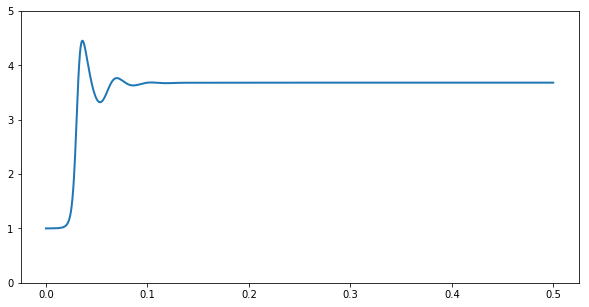

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

#I'm throwing away the filename as all I care about is column 2 and 20
data = np.genfromtxt('output/statistics',autostrip=True)

#check this read. It seems to work!
#print (y[1], y[19])
print (data[:,1])

#ok now let's see if we can plot it
fig = plt.figure( figsize = (10,5))
ax = fig.add_subplot(111)
ax.set_ylim([0., 5.0])

ax.plot(data[:,1],data[:,19],linewidth=2.0)
   
plt.show()

### 2.6 Visualization in ParaView

ParaView is an open-source, multi-platform data analysis and visualization application available from:

    http://www.paraview.org/
    
ParaView was developed to analyze extremely large datasets using distributed memory computing resources. It can be run on supercomputers to analyze datasets of petascale size as well as on laptops for smaller data. It supports visualization tools such as isosurfaces, slices, streamlines, volume rendering, and othe complex visualization techniques.

ParaView is not supported in Jupyter notebooks and must be launched from your desktop. Please see separate tutorial to learn how to use Paraview.

If you are running this notebook within a docker container, you must download the output files to use ParaView. Default location is in the 'output' folder. See Section 2.4 for instructions to download files.

**Tip:** ParaView files have the file extension .pvtu. ParaView data files have the file extension .pvd.


<img src="TempInit.jpg" style="display: inline-block;width: 50%; padding-right:25px; padding-left:105px"> <img src="TempFinal.jpg" style="display: inline-block; width: 40%; padding-left:25px"/1>

<center> Convection in a box: Initial temperature (left) and final state (right). Input file: convection-box.prm
</center> 
<br>
**Exercise:**  Reproduce the above plots in ParaView produced from the output files of convection-box.prm.

<em>Note: You will no longer be working inside the Notebook and/or container for this exercise.</em>
>**Step 1:** Download your 'output' folder.  See Section 2.4.

>**Step 2:** Launch ParaView.  

>**Step 3:** Open your .pvd file, e.g. solution.pvd.
>The file will contain temperature (<em>T</em>), pressure (<em>P</em>), and velocity.

> **Exercise:** Can you find where this was specified in the .prm file?<br>     
>> **Tip:** Look for:
    
>>        subsection Postprocess


>**Step 4:** Visualize the <em>T</em> field. 
>> **Tip:** In the Properties panel, change from <em>Solid Color</em> to <em>T</em>.

>**Step 4:** Visulize how <em>T</em> changes through time.

>> **Tip:** Select the play button on the toolbar. 


> **Exercise:** Try switiching paramenters, playing with color scales, and switching to other views!

### 2.7 Visualizing Heat flux

There are fun ways to visualize time varying parameters using sliders.

To do this we will rerun ASPECT with a convection-box2.prm file that will create hdf5 files.

> **Exercise:** What is the difference between convection-box2.prm and convection-box.prm?

** Note: ** hdf5 is the Hierarchical Data Format (HDF) is a set of file formats designed to store and organize large amounts of data developed at NCSDA and is freely available under an BSD-style open source license.

> ** Step 1: ** Run ASPECT with the file convection-box2.prm as input.

** Tip: ** Don't be afraid to cut and paste from previous cells to rerun ASPECT but do make sure you change the name of the input file.

In [6]:
!./aspect model_input/convection-box2.prm

--------------------------------------------------------------------------
[[47934,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: ff302707e8b2

Another transport will be used instead, although this may result in
lower performance.
--------------------------------------------------------------------------
-----------------------------------------------------------------------------
-- This is ASPECT, the Advanced Solver for Problems in Earth's ConvecTion.
--     . version 2.0.0-pre
--     . running in DEBUG mode
--     . running with 1 MPI process
--     . using Trilinos
-----------------------------------------------------------------------------


-----------------------------------------------------------------------------
The output directory <output-convection-box2/> provided in the input file appears not to exist.
ASPECT will create it for you.
----------------------------

   Solving temperature system... 27 iterations.
   Solving Stokes system... 24+0 iterations.

   Postprocessing:
     RMS, max velocity:                  33 m/s, 47.7 m/s
     Temperature min/avg/max:            0 K, 0.4994 K, 1 K
     Heat fluxes through boundary parts: 1.753e-05 W, -4.048e-06 W, -1.149 W, 1.227 W
     Writing graphical output:           output-convection-box2/solution/solution-00014
     Writing heat flux map:              output-convection-box2/heat_flux.00014

*** Timestep 15:  t=0.0184598 seconds
   Solving temperature system... 27 iterations.
   Solving Stokes system... 24+0 iterations.

   Postprocessing:
     RMS, max velocity:                  35.1 m/s, 50.7 m/s
     Temperature min/avg/max:            0 K, 0.4993 K, 1 K
     Heat fluxes through boundary parts: 1.912e-05 W, -3.744e-06 W, -1.17 W, 1.258 W
     Writing graphical output:           output-convection-box2/solution/solution-00015
     Writing heat flux map:              output-convection-box2/heat_f

   Solving temperature system... 21 iterations.
   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  60.3 m/s, 88.3 m/s
     Temperature min/avg/max:            0 K, 0.4972 K, 1 K
     Heat fluxes through boundary parts: 6.239e-05 W, 6.605e-06 W, -1.679 W, 1.955 W
     Writing graphical output:           output-convection-box2/solution/solution-00030
     Writing heat flux map:              output-convection-box2/heat_flux.00030

*** Timestep 31:  t=0.0220973 seconds
   Solving temperature system... 21 iterations.
   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  61.6 m/s, 90.3 m/s
     Temperature min/avg/max:            0 K, 0.497 K, 1 K
     Heat fluxes through boundary parts: 6.776e-05 W, 7.556e-06 W, -1.726 W, 2.015 W
     Writing graphical output:           output-convection-box2/solution/solution-00031
     Writing heat flux map:              output-convection-box2/heat_f

   Solving temperature system... 19 iterations.
   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  74.5 m/s, 110 m/s
     Temperature min/avg/max:            0 K, 0.4931 K, 1 K
     Heat fluxes through boundary parts: 0.0002444 W, 2.393e-05 W, -2.628 W, 3.015 W
     Writing graphical output:           output-convection-box2/solution/solution-00046
     Writing heat flux map:              output-convection-box2/heat_flux.00046

*** Timestep 47:  t=0.0245666 seconds
   Solving temperature system... 18 iterations.
   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  74.9 m/s, 111 m/s
     Temperature min/avg/max:            0 K, 0.4928 K, 1 K
     Heat fluxes through boundary parts: 0.0002661 W, 2.514e-05 W, -2.699 W, 3.083 W
     Writing graphical output:           output-convection-box2/solution/solution-00047
     Writing heat flux map:              output-convection-box2/heat_fl

   Solving temperature system... 17 iterations.
   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  76.4 m/s, 115 m/s
     Temperature min/avg/max:            0 K, 0.4871 K, 1 K
     Heat fluxes through boundary parts: 0.0008749 W, 4.418e-05 W, -3.827 W, 3.985 W
     Writing graphical output:           output-convection-box2/solution/solution-00062
     Writing heat flux map:              output-convection-box2/heat_flux.00062

*** Timestep 63:  t=0.0267563 seconds
   Solving temperature system... 17 iterations.
   Solving Stokes system... 21+0 iterations.

   Postprocessing:
     RMS, max velocity:                  76.1 m/s, 115 m/s
     Temperature min/avg/max:            0 K, 0.4867 K, 1 K
     Heat fluxes through boundary parts: 0.0009397 W, 4.54e-05 W, -3.901 W, 4.032 W
     Writing graphical output:           output-convection-box2/solution/solution-00063
     Writing heat flux map:              output-convection-box2/heat_flu

   Solving temperature system... 15 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  69.7 m/s, 108 m/s
     Temperature min/avg/max:            0 K, 0.4798 K, 1 K
     Heat fluxes through boundary parts: 0.00227 W, 5.541e-05 W, -4.822 W, 4.507 W
     Writing graphical output:           output-convection-box2/solution/solution-00078
     Writing heat flux map:              output-convection-box2/heat_flux.00078

*** Timestep 79:  t=0.0289921 seconds
   Solving temperature system... 15 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  69.1 m/s, 107 m/s
     Temperature min/avg/max:            0 K, 0.4794 K, 1 K
     Heat fluxes through boundary parts: 0.002372 W, 5.508e-05 W, -4.867 W, 4.522 W
     Writing graphical output:           output-convection-box2/solution/solution-00079
     Writing heat flux map:              output-convection-box2/heat_flux.

   Solving temperature system... 15 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  59.4 m/s, 93.7 m/s
     Temperature min/avg/max:            0 K, 0.4729 K, 1 K
     Heat fluxes through boundary parts: 0.003588 W, 2.295e-05 W, -5.214 W, 4.552 W
     Writing graphical output:           output-convection-box2/solution/solution-00094
     Writing heat flux map:              output-convection-box2/heat_flux.00094

*** Timestep 95:  t=0.0314848 seconds
   Solving temperature system... 15 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  58.7 m/s, 92.8 m/s
     Temperature min/avg/max:            0 K, 0.4726 K, 1 K
     Heat fluxes through boundary parts: 0.003631 W, 1.882e-05 W, -5.216 W, 4.542 W
     Writing graphical output:           output-convection-box2/solution/solution-00095
     Writing heat flux map:              output-convection-box2/heat_fl

   Solving temperature system... 15 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50.7 m/s, 81.3 m/s
     Temperature min/avg/max:            0 K, 0.4688 K, 1 K
     Heat fluxes through boundary parts: 0.003675 W, -4.92e-05 W, -5.035 W, 4.332 W
     Writing graphical output:           output-convection-box2/solution/solution-00108
     Writing heat flux map:              output-convection-box2/heat_flux.00108

*** Timestep 109:  t=0.0340046 seconds
   Solving temperature system... 15 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50.2 m/s, 80.5 m/s
     Temperature min/avg/max:            0 K, 0.4686 K, 1 K
     Heat fluxes through boundary parts: 0.003646 W, -5.478e-05 W, -5.008 W, 4.311 W
     Writing graphical output:           output-convection-box2/solution/solution-00109
     Writing heat flux map:              output-convection-box2/heat_

   Solving temperature system... 15 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  43.9 m/s, 70.8 m/s
     Temperature min/avg/max:            0 K, 0.4674 K, 1 K
     Heat fluxes through boundary parts: 0.00298 W, -0.0001191 W, -4.476 W, 3.961 W
     Writing graphical output:           output-convection-box2/solution/solution-00124
     Writing heat flux map:              output-convection-box2/heat_flux.00124

*** Timestep 125:  t=0.0373293 seconds
   Solving temperature system... 15 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  43.6 m/s, 70.4 m/s
     Temperature min/avg/max:            0 K, 0.4675 K, 1 K
     Heat fluxes through boundary parts: 0.002932 W, -0.0001215 W, -4.437 W, 3.938 W
     Writing graphical output:           output-convection-box2/solution/solution-00125
     Writing heat flux map:              output-convection-box2/heat_

   Solving temperature system... 16 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  41.4 m/s, 66.3 m/s
     Temperature min/avg/max:            0 K, 0.4693 K, 1 K
     Heat fluxes through boundary parts: 0.002332 W, -0.0001295 W, -3.885 W, 3.62 W
     Writing graphical output:           output-convection-box2/solution/solution-00140
     Writing heat flux map:              output-convection-box2/heat_flux.00140

*** Timestep 141:  t=0.041013 seconds
   Solving temperature system... 16 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  41.4 m/s, 66.2 m/s
     Temperature min/avg/max:            0 K, 0.4694 K, 1 K
     Heat fluxes through boundary parts: 0.002302 W, -0.0001286 W, -3.853 W, 3.603 W
     Writing graphical output:           output-convection-box2/solution/solution-00141
     Writing heat flux map:              output-convection-box2/heat_f

   Solving temperature system... 16 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  42.7 m/s, 67.3 m/s
     Temperature min/avg/max:            0 K, 0.4726 K, 1 K
     Heat fluxes through boundary parts: 0.002002 W, -0.0001055 W, -3.496 W, 3.409 W
     Writing graphical output:           output-convection-box2/solution/solution-00156
     Writing heat flux map:              output-convection-box2/heat_flux.00156

*** Timestep 157:  t=0.0447781 seconds
   Solving temperature system... 16 iterations.
   Solving Stokes system... 20+0 iterations.

   Postprocessing:
     RMS, max velocity:                  42.9 m/s, 67.5 m/s
     Temperature min/avg/max:            0 K, 0.4728 K, 1 K
     Heat fluxes through boundary parts: 0.001991 W, -0.0001037 W, -3.48 W, 3.401 W
     Writing graphical output:           output-convection-box2/solution/solution-00157
     Writing heat flux map:              output-convection-box2/heat_

   Solving temperature system... 16 iterations.
   Solving Stokes system... 19+0 iterations.

   Postprocessing:
     RMS, max velocity:                  46.1 m/s, 71.6 m/s
     Temperature min/avg/max:            0 K, 0.4758 K, 1 K
     Heat fluxes through boundary parts: 0.001916 W, -7.741e-05 W, -3.355 W, 3.352 W
     Writing graphical output:           output-convection-box2/solution/solution-00172
     Writing heat flux map:              output-convection-box2/heat_flux.00172

*** Timestep 173:  t=0.0483803 seconds
   Solving temperature system... 16 iterations.
   Solving Stokes system... 19+0 iterations.

   Postprocessing:
     RMS, max velocity:                  46.4 m/s, 72 m/s
     Temperature min/avg/max:            0 K, 0.476 K, 1 K
     Heat fluxes through boundary parts: 0.001916 W, -7.584e-05 W, -3.353 W, 3.354 W
     Writing graphical output:           output-convection-box2/solution/solution-00173
     Writing heat flux map:              output-convection-box2/heat_fl

*** Timestep 188:  t=0.0515377 seconds
   Solving temperature system... 16 iterations.
   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  49.9 m/s, 76.8 m/s
     Temperature min/avg/max:            0 K, 0.478 K, 1 K
     Heat fluxes through boundary parts: 0.001967 W, -5.592e-05 W, -3.4 W, 3.421 W
     Writing graphical output:           output-convection-box2/solution/solution-00188
     Writing heat flux map:              output-convection-box2/heat_flux.00188

*** Timestep 189:  t=0.0517411 seconds
   Solving temperature system... 16 iterations.
   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50.1 m/s, 77.1 m/s
     Temperature min/avg/max:            0 K, 0.4781 K, 1 K
     Heat fluxes through boundary parts: 0.001973 W, -5.485e-05 W, -3.408 W, 3.428 W
     Writing graphical output:           output-convection-box2/solution/solution-00189
     Writing heat flux map:     

   Solving temperature system... 15 iterations.
   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  52.4 m/s, 80.5 m/s
     Temperature min/avg/max:            0 K, 0.4791 K, 1 K
     Heat fluxes through boundary parts: 0.00207 W, -4.407e-05 W, -3.527 W, 3.54 W
     Writing graphical output:           output-convection-box2/solution/solution-00202
     Writing heat flux map:              output-convection-box2/heat_flux.00202

*** Timestep 203:  t=0.0545151 seconds
   Solving temperature system... 15 iterations.
   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  52.5 m/s, 80.7 m/s
     Temperature min/avg/max:            0 K, 0.4791 K, 1 K
     Heat fluxes through boundary parts: 0.002078 W, -4.347e-05 W, -3.538 W, 3.549 W
     Writing graphical output:           output-convection-box2/solution/solution-00203
     Writing heat flux map:              output-convection-box2/heat_f

*** Timestep 218:  t=0.0573795 seconds
   Solving temperature system... 14 iterations.
   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  53.8 m/s, 82.8 m/s
     Temperature min/avg/max:            0 K, 0.4794 K, 1 K
     Heat fluxes through boundary parts: 0.002219 W, -3.824e-05 W, -3.7 W, 3.685 W
     Writing graphical output:           output-convection-box2/solution/solution-00218
     Writing heat flux map:              output-convection-box2/heat_flux.00218

*** Timestep 219:  t=0.0575681 seconds
   Solving temperature system... 14 iterations.
   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  53.8 m/s, 82.9 m/s
     Temperature min/avg/max:            0 K, 0.4794 K, 1 K
     Heat fluxes through boundary parts: 0.002228 W, -3.812e-05 W, -3.711 W, 3.693 W
     Writing graphical output:           output-convection-box2/solution/solution-00219
     Writing heat flux map:    

   Solving temperature system... 14 iterations.
   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  53.7 m/s, 83.2 m/s
     Temperature min/avg/max:            0 K, 0.479 K, 1 K
     Heat fluxes through boundary parts: 0.002372 W, -3.944e-05 W, -3.845 W, 3.792 W
     Writing graphical output:           output-convection-box2/solution/solution-00234
     Writing heat flux map:              output-convection-box2/heat_flux.00234

*** Timestep 235:  t=0.0605737 seconds
   Solving temperature system... 14 iterations.
   Solving Stokes system... 18+0 iterations.

   Postprocessing:
     RMS, max velocity:                  53.7 m/s, 83.2 m/s
     Temperature min/avg/max:            0 K, 0.479 K, 1 K
     Heat fluxes through boundary parts: 0.002381 W, -3.97e-05 W, -3.853 W, 3.796 W
     Writing graphical output:           output-convection-box2/solution/solution-00235
     Writing heat flux map:              output-convection-box2/heat_fl

   Solving temperature system... 14 iterations.
   Solving Stokes system... 17+0 iterations.

   Postprocessing:
     RMS, max velocity:                  52.8 m/s, 82.1 m/s
     Temperature min/avg/max:            0 K, 0.4785 K, 1 K
     Heat fluxes through boundary parts: 0.00249 W, -4.541e-05 W, -3.928 W, 3.839 W
     Writing graphical output:           output-convection-box2/solution/solution-00250
     Writing heat flux map:              output-convection-box2/heat_flux.00250

*** Timestep 251:  t=0.0635955 seconds
   Solving temperature system... 14 iterations.
   Solving Stokes system... 17+0 iterations.

   Postprocessing:
     RMS, max velocity:                  52.7 m/s, 82 m/s
     Temperature min/avg/max:            0 K, 0.4785 K, 1 K
     Heat fluxes through boundary parts: 0.002495 W, -4.587e-05 W, -3.931 W, 3.84 W
     Writing graphical output:           output-convection-box2/solution/solution-00251
     Writing heat flux map:              output-convection-box2/heat_flu

   Solving temperature system... 14 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.5 m/s, 80.4 m/s
     Temperature min/avg/max:            0 K, 0.4781 K, 1 K
     Heat fluxes through boundary parts: 0.002536 W, -5.3e-05 W, -3.941 W, 3.833 W
     Writing graphical output:           output-convection-box2/solution/solution-00266
     Writing heat flux map:              output-convection-box2/heat_flux.00266

*** Timestep 267:  t=0.066672 seconds
   Solving temperature system... 14 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.4 m/s, 80.3 m/s
     Temperature min/avg/max:            0 K, 0.478 K, 1 K
     Heat fluxes through boundary parts: 0.002536 W, -5.346e-05 W, -3.939 W, 3.831 W
     Writing graphical output:           output-convection-box2/solution/solution-00267
     Writing heat flux map:              output-convection-box2/heat_flu

   Solving temperature system... 14 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50.4 m/s, 78.9 m/s
     Temperature min/avg/max:            0 K, 0.478 K, 1 K
     Heat fluxes through boundary parts: 0.002511 W, -5.922e-05 W, -3.9 W, 3.794 W
     Writing graphical output:           output-convection-box2/solution/solution-00282
     Writing heat flux map:              output-convection-box2/heat_flux.00282

*** Timestep 283:  t=0.069814 seconds
   Solving temperature system... 14 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50.4 m/s, 78.8 m/s
     Temperature min/avg/max:            0 K, 0.478 K, 1 K
     Heat fluxes through boundary parts: 0.002508 W, -5.951e-05 W, -3.896 W, 3.791 W
     Writing graphical output:           output-convection-box2/solution/solution-00283
     Writing heat flux map:              output-convection-box2/heat_flux

   Solving temperature system... 13 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  49.8 m/s, 77.9 m/s
     Temperature min/avg/max:            0 K, 0.4783 K, 1 K
     Heat fluxes through boundary parts: 0.00245 W, -6.233e-05 W, -3.834 W, 3.748 W
     Writing graphical output:           output-convection-box2/solution/solution-00298
     Writing heat flux map:              output-convection-box2/heat_flux.00298

*** Timestep 299:  t=0.073008 seconds
   Solving temperature system... 13 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  49.8 m/s, 77.8 m/s
     Temperature min/avg/max:            0 K, 0.4783 K, 1 K
     Heat fluxes through boundary parts: 0.002446 W, -6.241e-05 W, -3.83 W, 3.745 W
     Writing graphical output:           output-convection-box2/solution/solution-00299
     Writing heat flux map:              output-convection-box2/heat_fl

   Solving temperature system... 13 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  49.6 m/s, 77.6 m/s
     Temperature min/avg/max:            0 K, 0.4787 K, 1 K
     Heat fluxes through boundary parts: 0.002397 W, -6.242e-05 W, -3.779 W, 3.714 W
     Writing graphical output:           output-convection-box2/solution/solution-00312
     Writing heat flux map:              output-convection-box2/heat_flux.00312

*** Timestep 313:  t=0.0758243 seconds
   Solving temperature system... 13 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  49.7 m/s, 77.6 m/s
     Temperature min/avg/max:            0 K, 0.4788 K, 1 K
     Heat fluxes through boundary parts: 0.002394 W, -6.235e-05 W, -3.776 W, 3.713 W
     Writing graphical output:           output-convection-box2/solution/solution-00313
     Writing heat flux map:              output-convection-box2/heat

*** Timestep 328:  t=0.0788417 seconds
   Solving temperature system... 13 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  49.9 m/s, 77.8 m/s
     Temperature min/avg/max:            0 K, 0.4793 K, 1 K
     Heat fluxes through boundary parts: 0.002357 W, -6.041e-05 W, -3.735 W, 3.694 W
     Writing graphical output:           output-convection-box2/solution/solution-00328
     Writing heat flux map:              output-convection-box2/heat_flux.00328

*** Timestep 329:  t=0.0790424 seconds
   Solving temperature system... 13 iterations.
   Solving Stokes system... 16+0 iterations.

   Postprocessing:
     RMS, max velocity:                  49.9 m/s, 77.9 m/s
     Temperature min/avg/max:            0 K, 0.4794 K, 1 K
     Heat fluxes through boundary parts: 0.002355 W, -6.024e-05 W, -3.734 W, 3.693 W
     Writing graphical output:           output-convection-box2/solution/solution-00329
     Writing heat flux map:  

   Solving temperature system... 13 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50.3 m/s, 78.4 m/s
     Temperature min/avg/max:            0 K, 0.4799 K, 1 K
     Heat fluxes through boundary parts: 0.002343 W, -5.745e-05 W, -3.719 W, 3.692 W
     Writing graphical output:           output-convection-box2/solution/solution-00344
     Writing heat flux map:              output-convection-box2/heat_flux.00344

*** Timestep 345:  t=0.0822417 seconds
   Solving temperature system... 13 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50.3 m/s, 78.5 m/s
     Temperature min/avg/max:            0 K, 0.4799 K, 1 K
     Heat fluxes through boundary parts: 0.002343 W, -5.727e-05 W, -3.718 W, 3.692 W
     Writing graphical output:           output-convection-box2/solution/solution-00345
     Writing heat flux map:              output-convection-box2/heat

   Solving temperature system... 13 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50.8 m/s, 79.1 m/s
     Temperature min/avg/max:            0 K, 0.4803 K, 1 K
     Heat fluxes through boundary parts: 0.002352 W, -5.473e-05 W, -3.724 W, 3.703 W
     Writing graphical output:           output-convection-box2/solution/solution-00360
     Writing heat flux map:              output-convection-box2/heat_flux.00360

*** Timestep 361:  t=0.085415 seconds
   Solving temperature system... 13 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  50.8 m/s, 79.1 m/s
     Temperature min/avg/max:            0 K, 0.4803 K, 1 K
     Heat fluxes through boundary parts: 0.002353 W, -5.458e-05 W, -3.725 W, 3.704 W
     Writing graphical output:           output-convection-box2/solution/solution-00361
     Writing heat flux map:              output-convection-box2/heat_

*** Timestep 376:  t=0.0883693 seconds
   Solving temperature system... 12 iterations.
   Solving Stokes system... 14+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.5 m/s
     Temperature min/avg/max:            0 K, 0.4806 K, 1 K
     Heat fluxes through boundary parts: 0.002373 W, -5.293e-05 W, -3.743 W, 3.721 W
     Writing graphical output:           output-convection-box2/solution/solution-00376
     Writing heat flux map:              output-convection-box2/heat_flux.00376

*** Timestep 377:  t=0.0885657 seconds
   Solving temperature system... 12 iterations.
   Solving Stokes system... 14+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.6 m/s
     Temperature min/avg/max:            0 K, 0.4806 K, 1 K
     Heat fluxes through boundary parts: 0.002375 W, -5.286e-05 W, -3.744 W, 3.722 W
     Writing graphical output:           output-convection-box2/solution/solution-00377
     Writing heat flux map:  

   Solving temperature system... 12 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.2 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4807 K, 1 K
     Heat fluxes through boundary parts: 0.002398 W, -5.227e-05 W, -3.764 W, 3.738 W
     Writing graphical output:           output-convection-box2/solution/solution-00392
     Writing heat flux map:              output-convection-box2/heat_flux.00392

*** Timestep 393:  t=0.0917027 seconds
   Solving temperature system... 12 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.2 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4807 K, 1 K
     Heat fluxes through boundary parts: 0.002399 W, -5.226e-05 W, -3.765 W, 3.739 W
     Writing graphical output:           output-convection-box2/solution/solution-00393
     Writing heat flux map:              output-convection-box2/heat

   Solving temperature system... 11 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.2 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4808 K, 1 K
     Heat fluxes through boundary parts: 0.002416 W, -5.246e-05 W, -3.777 W, 3.748 W
     Writing graphical output:           output-convection-box2/solution/solution-00406
     Writing heat flux map:              output-convection-box2/heat_flux.00406

*** Timestep 407:  t=0.0944438 seconds
   Solving temperature system... 11 iterations.
   Solving Stokes system... 15+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51.1 m/s, 79.8 m/s
     Temperature min/avg/max:            0 K, 0.4808 K, 1 K
     Heat fluxes through boundary parts: 0.002417 W, -5.25e-05 W, -3.778 W, 3.749 W
     Writing graphical output:           output-convection-box2/solution/solution-00407
     Writing heat flux map:              output-convection-box2/heat_

*** Timestep 422:  t=0.0973833 seconds
   Solving temperature system... 12 iterations.
   Solving Stokes system... 14+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51 m/s, 79.6 m/s
     Temperature min/avg/max:            0 K, 0.4808 K, 1 K
     Heat fluxes through boundary parts: 0.002428 W, -5.319e-05 W, -3.785 W, 3.753 W
     Writing graphical output:           output-convection-box2/solution/solution-00422
     Writing heat flux map:              output-convection-box2/heat_flux.00422

*** Timestep 423:  t=0.0975794 seconds
   Solving temperature system... 12 iterations.
   Solving Stokes system... 14+0 iterations.

   Postprocessing:
     RMS, max velocity:                  51 m/s, 79.6 m/s
     Temperature min/avg/max:            0 K, 0.4808 K, 1 K
     Heat fluxes through boundary parts: 0.002429 W, -5.324e-05 W, -3.785 W, 3.753 W
     Writing graphical output:           output-convection-box2/solution/solution-00423
     Writing heat flux map:      

> **Step 2:** Check to see where your hdf5 files are.
>> **Exercise:** How many files are there?

In [7]:
!ls output-convection-box2/solution

mesh-00000.h5	   solution-00109.h5  solution-00219.h5  solution-00329.h5
solution-00000.h5  solution-00110.h5  solution-00220.h5  solution-00330.h5
solution-00001.h5  solution-00111.h5  solution-00221.h5  solution-00331.h5
solution-00002.h5  solution-00112.h5  solution-00222.h5  solution-00332.h5
solution-00003.h5  solution-00113.h5  solution-00223.h5  solution-00333.h5
solution-00004.h5  solution-00114.h5  solution-00224.h5  solution-00334.h5
solution-00005.h5  solution-00115.h5  solution-00225.h5  solution-00335.h5
solution-00006.h5  solution-00116.h5  solution-00226.h5  solution-00336.h5
solution-00007.h5  solution-00117.h5  solution-00227.h5  solution-00337.h5
solution-00008.h5  solution-00118.h5  solution-00228.h5  solution-00338.h5
solution-00009.h5  solution-00119.h5  solution-00229.h5  solution-00339.h5
solution-00010.h5  solution-00120.h5  solution-00230.h5  solution-00340.h5
solution-00011.h5  solution-00121.h5  solution-00231.h5  solution-00341.h5
solution-00012.h5  solution

> **Step 3:** Run the visualization code in the next cell. 
>> **Exercise:** Can you guess what it will plot?

>> **Exercise:** How many files are you reading in?

>> **Exercise:** Play with the sliders!

** Debug:** If your laptop does not have a lot of memory, you will not be able to read in all the files. You will need to modify the code below. Uncomment the 'for' (line 17) statement and select the files you want to read. Do not forget to comment out the corresponding 'for' (line 19).
<br>

<IPython.core.display.Javascript object>


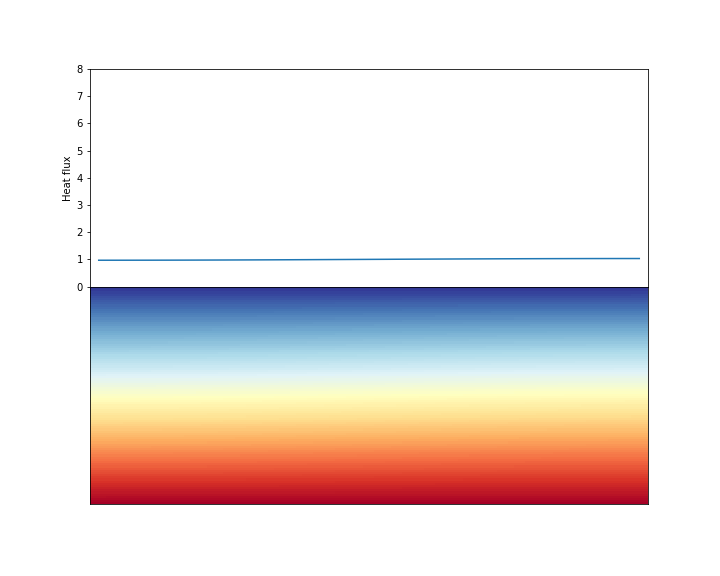

In [10]:
# Author: Ian Rose 16 May 2017
#not all imports are necessary but sometimes I start in the middle of the notebook ... whoops.
#this script may generate a nonfatal error (Notebook validation error) that has been reported to the Jupyter group
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
import glob
import tables
import scipy.interpolate as interpolate
%matplotlib notebook

# Load the visualization output files
viz_files = sorted(glob.glob('output-convection-box2/solution/solution*.h5'))
viz_data = []
mesh_x, mesh_y = np.meshgrid(np.linspace(0., 1., 100), np.linspace(0,1, 100))
#If you have limited memory, you may want to choose the number of timesteps read. The following line sets it to 99.
#for fname in viz_files[:1]:
#read in all the files. Comment this out if you have limited memory.
for fname in viz_files:
    mesh = tables.open_file('output-convection-box2/solution/mesh-00000.h5', mode='r')
    fields = tables.open_file(fname, mode='r')
    nodes = mesh.root.nodes
    field = getattr(fields.root, 'T')
    coords = np.array([x for x in nodes])
    values = np.array([t for t in field])[:,0]
    fn = interpolate.LinearNDInterpolator(coords,values)
    viz_data.append(fn(mesh_x,mesh_y))
    
# Get the heat flux output files
flux_files = sorted(glob.glob('output-convection-box2/heat_flux.*'))
flux_data = []
#Comment these lines like above for limited memory computers.
#for fname in flux_files[:99]:
for fname in flux_files:
    data = np.loadtxt(fname, skiprows=1)
    indices = np.where(data[:,1]>0.99)
    flux_data.append( *list(zip(data[indices,0], data[indices,2])))
    
# Create the figure
fig = plt.figure(num='Heat flux through the top surface', figsize=(10,8))
ax1 = fig.add_subplot(211)
line, = ax1.plot(flux_data[0][0],flux_data[0][1])
ax1.set_xlim(0., 1.)
ax1.set_ylim(0., 8.)
ax1.set_ylabel('Heat flux')
ax1.xaxis.set_visible(False)

ax2 = fig.add_subplot(212)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

image = ax2.pcolormesh(viz_data[0], cmap='RdYlBu_r')
fig.subplots_adjust(hspace=0)

@ipywidgets.interact(timestep=(0, len(viz_data)-1))
def update_plot(timestep):
    line.set_data(flux_data[timestep][0], flux_data[timestep][1])
    image.set_array(viz_data[timestep].ravel())


## 3.0 Nusselt-Rayleigh Number Relationship

** If the Rayleigh number goes up, how does the Nusselt number change?**

** How does the mesh resolution affect the accuracy of these results? **

In this exercise, ASPECT is used to study the relationship between the Rayleigh ($Ra$) number and the surface heat flux. In geodynamics, the Rayleigh number indicates the presence and strength of convection in the mantle. The Nusselt ($Nu$) number is the ratio of convective to conductive heat transfer.  

$Ra$ is related to viscosity ($\eta$) through the following relationship:

\begin{align}
  Ra = {{ \rho_0 g \alpha \Delta T D^3 } \over {\eta \kappa}}
\end{align}

\begin{align}
  \eta = {{ \rho_0 g \alpha \Delta T D^3 } \over {\kappa Ra} }
\end{align} 

\begin{align}
  = {{5.0993 x 10^{28}} \over {Ra} }
\end{align} 

     
The Nusselt number is the ratio of convective to conductive heat transfer and is related to the heat flux.

Select from the table a refinement level, end time, and Rayleigh number.

| Ra        | 4000 | 20000 | 100000 | 500000 |
|-----------|------|-------|--------|--------|
| end time  |  1.000e+12 |  2.000e+11 | 3.000+10   |  5.000e+09 |
| viscosity |  1.275e+25 |  2.550e+24 | 5.099e+23  |  1.020e+23 |
| Refine 3  | | | | |
| Refine 4  | | | | |
| Refine 5  | | | | | |

> **Step 1:** From your desktop, modify the tutorial.prm file according to your selection.

> * end time is part of the General parameters:
        set End time

> * viscosity is part of: 
        subsection Material model

> * Refine is part of:
        subsection Mesh refinement

> **Step 2:** Run ASPECT.

> **Step 3: **Keep track of the heat flux number at the top boundary (boundary 3) and populate the above table.
>> **HINT:** Look in the file 'statistics' or the output to the terminal window.

**WARNING:** higher refinement levels and higher $Ra$ numbers require longer computational time and may take a long time to complete on most computers running with 1 mpi process.




In [11]:
!./aspect model_input/tutorial.prm

--------------------------------------------------------------------------
[[47467,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: ff302707e8b2

Another transport will be used instead, although this may result in
lower performance.
--------------------------------------------------------------------------
-----------------------------------------------------------------------------
-- This is ASPECT, the Advanced Solver for Problems in Earth's ConvecTion.
--     . version 2.0.0-pre
--     . running in DEBUG mode
--     . running with 1 MPI process
--     . using Trilinos
-----------------------------------------------------------------------------


-----------------------------------------------------------------------------
The output directory <output-tutorial/> provided in the input file appears not to exist.
ASPECT will create it for you.
-----------------------------------

     RMS, max velocity:                  0.000362 m/year, 0.000591 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -44.88 W, 49.35 W, -4.539e+04 W, 4.562e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00013
     Writing particle output:            output-tutorial/particles/particles-00013

*** Timestep 14:  t=2.44903e+10 years
   Solving temperature system... 8 iterations.
   Solving Stokes system... 12+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000377 m/year, 0.000616 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -56.15 W, 61.95 W, -4.864e+04 W, 4.887e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00014
     Writing particle output:            output-tutorial/particles/particles-00014

*** Timestep 15:  t=2.47943e+10 years
   Solving temperature system... 8 i

     RMS, max velocity:                  0.000374 m/year, 0.000595 m/year
     Temperature min/avg/max:            273 K, 1935 K, 3600 K
     Heat fluxes through boundary parts: -633.9 W, 688.7 W, -8.39e+04 W, 8.356e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00031
     Writing particle output:            output-tutorial/particles/particles-00031

*** Timestep 32:  t=2.9654e+10 years
   Solving temperature system... 8 iterations.
   Solving Stokes system... 12+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000366 m/year, 0.000582 m/year
     Temperature min/avg/max:            273 K, 1935 K, 3600 K
     Heat fluxes through boundary parts: -667.2 W, 723 W, -8.384e+04 W, 8.349e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00032
     Writing particle output:            output-tutorial/particles/particles-00032

*** Timestep 33:  t=2.99763e+10 years
   Solving temperature system... 8 itera

   Solving Stokes system... 11+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000298 m/year, 0.00047 m/year
     Temperature min/avg/max:            273 K, 1935 K, 3600 K
     Heat fluxes through boundary parts: -675.5 W, 723 W, -6.978e+04 W, 6.97e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00049
     Writing particle output:            output-tutorial/particles/particles-00049

*** Timestep 50:  t=3.63838e+10 years
   Solving temperature system... 8 iterations.
   Solving Stokes system... 11+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000299 m/year, 0.000471 m/year
     Temperature min/avg/max:            273 K, 1935 K, 3600 K
     Heat fluxes through boundary parts: -664.1 W, 711.3 W, -6.924e+04 W, 6.917e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00050
     Writing particle output:            output-tutorial/particles/particles-00050

*** Timestep 

   Solving temperature system... 7 iterations.
   Solving Stokes system... 11+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.00033 m/year, 0.000526 m/year
     Temperature min/avg/max:            273 K, 1935 K, 3600 K
     Heat fluxes through boundary parts: -578.1 W, 624.6 W, -6.98e+04 W, 6.975e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00067
     Writing particle output:            output-tutorial/particles/particles-00067

*** Timestep 68:  t=4.31506e+10 years
   Solving temperature system... 7 iterations.
   Solving Stokes system... 10+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000331 m/year, 0.000527 m/year
     Temperature min/avg/max:            273 K, 1935 K, 3600 K
     Heat fluxes through boundary parts: -579.1 W, 625.7 W, -7.008e+04 W, 7.003e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00068
     Writing particle output:            output-

     RMS, max velocity:                  0.00033 m/year, 0.000525 m/year
     Temperature min/avg/max:            273 K, 1935 K, 3600 K
     Heat fluxes through boundary parts: -622.8 W, 672.6 W, -7.25e+04 W, 7.243e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00084
     Writing particle output:            output-tutorial/particles/particles-00084

*** Timestep 85:  t=4.91704e+10 years
   Solving temperature system... 7 iterations.
   Solving Stokes system... 10+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.00033 m/year, 0.000524 m/year
     Temperature min/avg/max:            273 K, 1935 K, 3600 K
     Heat fluxes through boundary parts: -624.8 W, 674.6 W, -7.249e+04 W, 7.242e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00085
     Writing particle output:            output-tutorial/particles/particles-00085

*** Timestep 86:  t=4.95285e+10 years
   Solving temperature system... 7 iter

     RMS, max velocity:                  0.000324 m/year, 0.000514 m/year
     Temperature min/avg/max:            273 K, 1935 K, 3600 K
     Heat fluxes through boundary parts: -625.2 W, 674.3 W, -7.137e+04 W, 7.131e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00102
     Writing particle output:            output-tutorial/particles/particles-00102

*** Timestep 103:  t=5.56949e+10 years
   Solving temperature system... 7 iterations.
   Solving Stokes system... 9+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000324 m/year, 0.000514 m/year
     Temperature min/avg/max:            273 K, 1935 K, 3600 K
     Heat fluxes through boundary parts: -624.3 W, 673.3 W, -7.132e+04 W, 7.127e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00103
     Writing particle output:            output-tutorial/particles/particles-00103

*** Timestep 104:  t=5.60593e+10 years
   Solving temperature system... 7 

   Solving Stokes system... 9+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000519 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -615.8 W, 665.2 W, -7.132e+04 W, 7.127e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00120
     Writing particle output:            output-tutorial/particles/particles-00120

*** Timestep 121:  t=6.22281e+10 years
   Solving temperature system... 7 iterations.
   Solving Stokes system... 9+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000327 m/year, 0.000519 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -615.9 W, 665.3 W, -7.134e+04 W, 7.129e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00121
     Writing particle output:            output-tutorial/particles/particles-00121

*** Timest

   Solving temperature system... 6 iterations.
   Solving Stokes system... 8+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000519 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -619.4 W, 669.1 W, -7.154e+04 W, 7.15e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00138
     Writing particle output:            output-tutorial/particles/particles-00138

*** Timestep 139:  t=6.873e+10 years
   Solving temperature system... 6 iterations.
   Solving Stokes system... 8+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000519 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -619.5 W, 669.3 W, -7.154e+04 W, 7.15e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00139
     Writing particle output:            output-tut

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -619.5 W, 669.2 W, -7.146e+04 W, 7.141e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00155
     Writing particle output:            output-tutorial/particles/particles-00155

*** Timestep 156:  t=7.48819e+10 years
   Solving temperature system... 6 iterations.
   Solving Stokes system... 7+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -619.4 W, 669.2 W, -7.145e+04 W, 7.141e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00156
     Writing particle output:            output-tutorial/particles/particles-00156

*** Timestep 157:  t=7.5244e+10 years
   Solving temperature system... 6 i

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.7 W, 668.5 W, -7.145e+04 W, 7.141e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00173
     Writing particle output:            output-tutorial/particles/particles-00173

*** Timestep 174:  t=8.13965e+10 years
   Solving temperature system... 6 iterations.
   Solving Stokes system... 5+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.7 W, 668.5 W, -7.145e+04 W, 7.141e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00174
     Writing particle output:            output-tutorial/particles/particles-00174

*** Timestep 175:  t=8.17583e+10 years
   Solving temperature system... 6 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -619 W, 668.8 W, -7.147e+04 W, 7.143e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00191
     Writing particle output:            output-tutorial/particles/particles-00191

*** Timestep 192:  t=8.79084e+10 years
   Solving temperature system... 5 iterations.
   Solving Stokes system... 5+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -619 W, 668.8 W, -7.147e+04 W, 7.143e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00192
     Writing particle output:            output-tutorial/particles/particles-00192

*** Timestep 193:  t=8.82702e+10 years
   Solving temperature system... 5 iter

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -619 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00206
     Writing particle output:            output-tutorial/particles/particles-00206

*** Timestep 207:  t=9.33358e+10 years
   Solving temperature system... 5 iterations.
   Solving Stokes system... 5+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -619 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00207
     Writing particle output:            output-tutorial/particles/particles-00207

*** Timestep 208:  t=9.36976e+10 years
   Solving temperature system... 5 iter

   Solving temperature system... 5 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.8 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00224
     Writing particle output:            output-tutorial/particles/particles-00224

*** Timestep 225:  t=9.98488e+10 years
   Solving temperature system... 5 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.8 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00225
     Writing particle output:            output

   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.8 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00241
     Writing particle output:            output-tutorial/particles/particles-00241

*** Timestep 242:  t=1.06e+11 years
   Solving temperature system... 4 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.8 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00242
     Writing particle output:            output-tutorial/particles/particles-00242

*** Timestep 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00258
     Writing particle output:            output-tutorial/particles/particles-00258

*** Timestep 259:  t=1.12151e+11 years
   Solving temperature system... 4 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00259
     Writing particle output:            output-tutorial/particles/particles-00259

*** Timestep 260:  t=1.12513e+11 years
   Solving temperature system... 4 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00275
     Writing particle output:            output-tutorial/particles/particles-00275

*** Timestep 276:  t=1.18302e+11 years
   Solving temperature system... 4 iterations.
   Solving Stokes system... 4+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00276
     Writing particle output:            output-tutorial/particles/particles-00276

*** Timestep 277:  t=1.18664e+11 years
   Solving temperature system... 4 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00293
     Writing particle output:            output-tutorial/particles/particles-00293

*** Timestep 294:  t=1.24814e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00294
     Writing particle output:            output-tutorial/particles/particles-00294

*** Timestep 295:  t=1.25176e+11 years
   Solving temperature system... 3 

*** Timestep 308:  t=1.2988e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00308
     Writing particle output:            output-tutorial/particles/particles-00308

*** Timestep 309:  t=1.30242e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00309
     Writ

   Solving temperature system... 3 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00325
     Writing particle output:            output-tutorial/particles/particles-00325

*** Timestep 326:  t=1.36393e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 3+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00326
     Writing particle output:            output

   Solving temperature system... 3 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00343
     Writing particle output:            output-tutorial/particles/particles-00343

*** Timestep 344:  t=1.42906e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00344
     Writing particle output:            output

*** Timestep 361:  t=1.49057e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00361
     Writing particle output:            output-tutorial/particles/particles-00361

*** Timestep 362:  t=1.49418e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00362
     Wri

   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00379
     Writing particle output:            output-tutorial/particles/particles-00379

*** Timestep 380:  t=1.55931e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00380
     Writing particle output:            output

   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00396
     Writing particle output:            output-tutorial/particles/particles-00396

*** Timestep 397:  t=1.62082e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00397
     Writing particle output:            output-tutorial/particles/particles-00397

*** Timest

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00411
     Writing particle output:            output-tutorial/particles/particles-00411

*** Timestep 412:  t=1.6751e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00412
     Writing particle output:            output-

   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00429
     Writing particle output:            output-tutorial/particles/particles-00429

*** Timestep 430:  t=1.74022e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00430
     Writing particle output:            output

   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00446
     Writing particle output:            output-tutorial/particles/particles-00446

*** Timestep 447:  t=1.80173e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00447
     Writing particle output:            output-tutorial/particles/particles-00447

*** Timest

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00463
     Writing particle output:            output-tutorial/particles/particles-00463

*** Timestep 464:  t=1.86324e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00464
     Writing particle output:            output-tutorial/particles/particles-00464

*** Timestep 465:  t=1.86686e+11 years
   Solving temperature system... 2 

   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00481
     Writing particle output:            output-tutorial/particles/particles-00481

*** Timestep 482:  t=1.92837e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00482
     Writing particle output:            output-tutorial/particles/particles-00482

*** Timest

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00498
     Writing particle output:            output-tutorial/particles/particles-00498

*** Timestep 499:  t=1.98988e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00499
     Writing particle output:            output-tutorial/particles/particles-00499

*** Timestep 500:  t=1.9935e+11 years
   Solving temperature system... 2 i

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00513
     Writing particle output:            output-tutorial/particles/particles-00513

*** Timestep 514:  t=2.04415e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00514
     Writing particle output:            output

   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00530
     Writing particle output:            output-tutorial/particles/particles-00530

*** Timestep 531:  t=2.10566e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00531
     Writing particle output:            output-tutorial/particles/particles-00531

*** Timest

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00547
     Writing particle output:            output-tutorial/particles/particles-00547

*** Timestep 548:  t=2.16717e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00548
     Writing particle output:            output-tutorial/particles/particles-00548

*** Timestep 549:  t=2.17079e+11 years
   Solving temperature system... 2 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00565
     Writing particle output:            output-tutorial/particles/particles-00565

*** Timestep 566:  t=2.2323e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00566
     Writing particle output:            output-tutorial/particles/particles-00566

*** Timestep 567:  t=2.23592e+11 years
   Solving temperature system... 2 i

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00582
     Writing particle output:            output-tutorial/particles/particles-00582

*** Timestep 583:  t=2.29381e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00583
     Writing particle output:            output-tutorial/particles/particles-00583

*** Timestep 584:  t=2.29743e+11 years
   Solving temperature system... 2 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00599
     Writing particle output:            output-tutorial/particles/particles-00599

*** Timestep 600:  t=2.35532e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00600
     Writing particle output:            output-tutorial/particles/particles-00600



+---------------------------------------------+------------+------------

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00612
     Writing particle output:            output-tutorial/particles/particles-00612

*** Timestep 613:  t=2.40236e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00613
     Writing particle output:            output

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00629
     Writing particle output:            output-tutorial/particles/particles-00629

*** Timestep 630:  t=2.46387e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00630
     Writing particle output:            output

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00645
     Writing particle output:            output-tutorial/particles/particles-00645

*** Timestep 646:  t=2.52176e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00646
     Writing particle output:            output-tutorial/particles/particles-00646

*** Timestep 647:  t=2.52538e+11 years
   Solving temperature system... 2 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00662
     Writing particle output:            output-tutorial/particles/particles-00662

*** Timestep 663:  t=2.58327e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00663
     Writing particle output:            output-tutorial/particles/particles-00663

*** Timestep 664:  t=2.58689e+11 years
   Solving temperature system... 3 

   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00679
     Writing particle output:            output-tutorial/particles/particles-00679

*** Timestep 680:  t=2.64478e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00680
     Writing particle output:            output-tutorial/particles/particles-00680

*** Timest

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00695
     Writing particle output:            output-tutorial/particles/particles-00695

*** Timestep 696:  t=2.70267e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00696
     Writing particle output:            output-tutorial/particles/particles-00696

*** Timestep 697:  t=2.70629e+11 years
   Solving temperature system... 2 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00709
     Writing particle output:            output-tutorial/particles/particles-00709

*** Timestep 710:  t=2.75333e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00710
     Writing particle output:            output

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00726
     Writing particle output:            output-tutorial/particles/particles-00726

*** Timestep 727:  t=2.81484e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00727
     Writing particle output:            output

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00742
     Writing particle output:            output-tutorial/particles/particles-00742

*** Timestep 743:  t=2.87273e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00743
     Writing particle output:            output

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00758
     Writing particle output:            output-tutorial/particles/particles-00758

*** Timestep 759:  t=2.93062e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00759
     Writing particle output:            output-tutorial/particles/particles-00759

*** Timestep 760:  t=2.93424e+11 years
   Solving temperature system... 2 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00774
     Writing particle output:            output-tutorial/particles/particles-00774

*** Timestep 775:  t=2.98851e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00775
     Writing particle output:            output-tutorial/particles/particles-00775

*** Timestep 776:  t=2.99213e+11 years
   Solving temperature system... 2 

   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00790
     Writing particle output:            output-tutorial/particles/particles-00790

*** Timestep 791:  t=3.0464e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00791
     Writing particle output:            output-tutorial/particles/particles-00791

*** Timeste

   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00803
     Writing particle output:            output-tutorial/particles/particles-00803

*** Timestep 804:  t=3.09344e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00804
     Writing particle output:            output-tutorial/particles/particles-00804

*** Timest

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00819
     Writing particle output:            output-tutorial/particles/particles-00819

*** Timestep 820:  t=3.15133e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00820
     Writing particle output:            output-tutorial/particles/particles-00820

*** Timestep 821:  t=3.15495e+11 years
   Solving temperature system... 2 

   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00835
     Writing particle output:            output-tutorial/particles/particles-00835

*** Timestep 836:  t=3.20922e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00836
     Writing particle output:            output-tutorial/particles/particles-00836

*** Timest

   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00853
     Writing particle output:            output-tutorial/particles/particles-00853

*** Timestep 854:  t=3.27435e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00854
     Writing particle output:            output-tutorial/particles/particles-00854

*** Timest

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00869
     Writing particle output:            output-tutorial/particles/particles-00869

*** Timestep 870:  t=3.33224e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00870
     Writing particle output:            output

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00887
     Writing particle output:            output-tutorial/particles/particles-00887

*** Timestep 888:  t=3.39737e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00888
     Writing particle output:            output

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00903
     Writing particle output:            output-tutorial/particles/particles-00903

*** Timestep 904:  t=3.45526e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00904
     Writing particle output:            output

   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00921
     Writing particle output:            output-tutorial/particles/particles-00921

*** Timestep 922:  t=3.52039e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00922
     Writing particle output:            output-tutorial/particles/particles-00922

*** Timest

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00937
     Writing particle output:            output-tutorial/particles/particles-00937

*** Timestep 938:  t=3.57828e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00938
     Writing particle output:            output-tutorial/particles/particles-00938

*** Timestep 939:  t=3.5819e+11 years
   Solving temperature system... 2 i

   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00953
     Writing particle output:            output-tutorial/particles/particles-00953

*** Timestep 954:  t=3.63617e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00954
     Writing particle output:            output-tutorial/particles/particles-00954

*** Timest

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00969
     Writing particle output:            output-tutorial/particles/particles-00969

*** Timestep 970:  t=3.69407e+11 years
   Solving temperature system... 1 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00970
     Writing particle output:            output

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00987
     Writing particle output:            output-tutorial/particles/particles-00987

*** Timestep 988:  t=3.75919e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-00988
     Writing particle output:            output-tutorial/particles/particles-00988

*** Timestep 989:  t=3.76281e+11 years
   Solving temperature system... 2 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01003
     Writing particle output:            output-tutorial/particles/particles-01003

*** Timestep 1004:  t=3.81709e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01004
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01018
     Writing particle output:            output-tutorial/particles/particles-01018

*** Timestep 1019:  t=3.87136e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01019
     Writing particle output:            output-tutorial/particles/particles-01019

*** Timestep 1020:  t=3.87498e+11 years
   Solving temperature system... 

*** Timestep 1034:  t=3.92563e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01034
     Writing particle output:            output-tutorial/particles/particles-01034

*** Timestep 1035:  t=3.92925e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01035
     W

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01051
     Writing particle output:            output-tutorial/particles/particles-01051

*** Timestep 1052:  t=3.99076e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01052
     Writing particle output:            output-tutorial/particles/particles-01052

*** Timestep 1053:  t=3.99438e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01069
     Writing particle output:            output-tutorial/particles/particles-01069

*** Timestep 1070:  t=4.05589e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01070
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01085
     Writing particle output:            output-tutorial/particles/particles-01085

*** Timestep 1086:  t=4.11378e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01086
     Writing particle output:            output-tutorial/particles/particles-01086

*** Timestep 1087:  t=4.1174e+11 years
   Solving temperature system... 2

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01102
     Writing particle output:            output-tutorial/particles/particles-01102

*** Timestep 1103:  t=4.17529e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01103
     Writing particle output:            output-tutorial/particles/particles-01103

*** Timestep 1104:  t=4.17891e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01120
     Writing particle output:            output-tutorial/particles/particles-01120

*** Timestep 1121:  t=4.24042e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01121
     Writing particle output:            outpu

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01137
     Writing particle output:            output-tutorial/particles/particles-01137

*** Timestep 1138:  t=4.30193e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01138
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01152
     Writing particle output:            output-tutorial/particles/particles-01152

*** Timestep 1153:  t=4.3562e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01153
     Writing particle output:            output-tutorial/particles/particles-01153

*** Timestep 1154:  t=4.35982e+11 years
   Solving temperature system... 2

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01169
     Writing particle output:            output-tutorial/particles/particles-01169

*** Timestep 1170:  t=4.41771e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01170
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01185
     Writing particle output:            output-tutorial/particles/particles-01185

*** Timestep 1186:  t=4.4756e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01186
     Writing particle output:            output-tutorial/particles/particles-01186

*** Timestep 1187:  t=4.47922e+11 years
   Solving temperature system... 2

   Solving temperature system... 3 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01203
     Writing particle output:            output-tutorial/particles/particles-01203

*** Timestep 1204:  t=4.54073e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01204
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01220
     Writing particle output:            output-tutorial/particles/particles-01220

*** Timestep 1221:  t=4.60224e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01221
     Writing particle output:            output-tutorial/particles/particles-01221

*** Timestep 1222:  t=4.60586e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01237
     Writing particle output:            output-tutorial/particles/particles-01237

*** Timestep 1238:  t=4.66375e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01238
     Writing particle output:            output-tutorial/particles/particles-01238

*** Timestep 1239:  t=4.66737e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01253
     Writing particle output:            output-tutorial/particles/particles-01253

*** Timestep 1254:  t=4.72164e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01254
     Writing particle output:            output-tutorial/particles/particles-01254

*** Timestep 1255:  t=4.72526e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01271
     Writing particle output:            output-tutorial/particles/particles-01271

*** Timestep 1272:  t=4.78677e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01272
     Writing particle output:            outpu

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01288
     Writing particle output:            output-tutorial/particles/particles-01288

*** Timestep 1289:  t=4.84828e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01289
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01302
     Writing particle output:            output-tutorial/particles/particles-01302

*** Timestep 1303:  t=4.89894e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01303
     Writing particle output:            output-tutorial/particles/particles-01303

*** Timestep 1304:  t=4.90255e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01319
     Writing particle output:            output-tutorial/particles/particles-01319

*** Timestep 1320:  t=4.96045e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01320
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01335
     Writing particle output:            output-tutorial/particles/particles-01335

*** Timestep 1336:  t=5.01834e+11 years
   Solving temperature system... 1 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01336
     Writing particle output:            output-tutorial/particles/particles-01336

*** Timestep 1337:  t=5.02195e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01352
     Writing particle output:            output-tutorial/particles/particles-01352

*** Timestep 1353:  t=5.07985e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01353
     Writing particle output:            output-tutorial/particles/particles-01353

*** Timestep 1354:  t=5.08346e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01369
     Writing particle output:            output-tutorial/particles/particles-01369

*** Timestep 1370:  t=5.14136e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01370
     Writing particle output:            output-tutorial/particles/particles-01370

*** Timestep 1371:  t=5.14497e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01386
     Writing particle output:            output-tutorial/particles/particles-01386

*** Timestep 1387:  t=5.20287e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01387
     Writing particle output:            output-tutorial/particles/particles-01387

*** Timestep 1388:  t=5.20648e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01403
     Writing particle output:            output-tutorial/particles/particles-01403

*** Timestep 1404:  t=5.26438e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01404
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01419
     Writing particle output:            output-tutorial/particles/particles-01419

*** Timestep 1420:  t=5.32227e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01420
     Writing particle output:            output-tutorial/particles/particles-01420

*** Timestep 1421:  t=5.32589e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01436
     Writing particle output:            output-tutorial/particles/particles-01436

*** Timestep 1437:  t=5.38378e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01437
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01452
     Writing particle output:            output-tutorial/particles/particles-01452

*** Timestep 1453:  t=5.44167e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01453
     Writing particle output:            output-tutorial/particles/particles-01453

*** Timestep 1454:  t=5.44529e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01468
     Writing particle output:            output-tutorial/particles/particles-01468

*** Timestep 1469:  t=5.49956e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01469
     Writing particle output:            output-tutorial/particles/particles-01469

*** Timestep 1470:  t=5.50318e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01484
     Writing particle output:            output-tutorial/particles/particles-01484

*** Timestep 1485:  t=5.55745e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01485
     Writing particle output:            output-tutorial/particles/particles-01485

*** Timestep 1486:  t=5.56107e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01501
     Writing particle output:            output-tutorial/particles/particles-01501

*** Timestep 1502:  t=5.61896e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01502
     Writing particle output:            outpu

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01517
     Writing particle output:            output-tutorial/particles/particles-01517

*** Timestep 1518:  t=5.67685e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01518
     Writing particle output:            outpu

*** Timestep 1533:  t=5.73113e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01533
     Writing particle output:            output-tutorial/particles/particles-01533

*** Timestep 1534:  t=5.73475e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01534
     W

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01549
     Writing particle output:            output-tutorial/particles/particles-01549

*** Timestep 1550:  t=5.79264e+11 years
   Solving temperature system... 1 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01550
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01566
     Writing particle output:            output-tutorial/particles/particles-01566

*** Timestep 1567:  t=5.85415e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01567
     Writing particle output:            output-tutorial/particles/particles-01567

*** Timestep 1568:  t=5.85777e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01582
     Writing particle output:            output-tutorial/particles/particles-01582

*** Timestep 1583:  t=5.91204e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01583
     Writing particle output:            output-tutorial/particles/particles-01583

*** Timestep 1584:  t=5.91566e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01598
     Writing particle output:            output-tutorial/particles/particles-01598

*** Timestep 1599:  t=5.96993e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01599
     Writing particle output:            output-tutorial/particles/particles-01599

*** Timestep 1600:  t=5.97355e+11 years
   Solving temperature system... 

*** Timestep 1612:  t=6.01697e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01612
     Writing particle output:            output-tutorial/particles/particles-01612

*** Timestep 1613:  t=6.02059e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01613
     W

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01627
     Writing particle output:            output-tutorial/particles/particles-01627

*** Timestep 1628:  t=6.07486e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01628
     Writing particle output:            output-tutorial/particles/particles-01628

*** Timestep 1629:  t=6.07848e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01643
     Writing particle output:            output-tutorial/particles/particles-01643

*** Timestep 1644:  t=6.13275e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01644
     Writing particle output:            output-tutorial/particles/particles-01644

*** Timestep 1645:  t=6.13637e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01659
     Writing particle output:            output-tutorial/particles/particles-01659

*** Timestep 1660:  t=6.19064e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01660
     Writing particle output:            output-tutorial/particles/particles-01660

*** Timestep 1661:  t=6.19426e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01675
     Writing particle output:            output-tutorial/particles/particles-01675

*** Timestep 1676:  t=6.24853e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01676
     Writing particle output:            outpu

*** Timestep 1691:  t=6.30281e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01691
     Writing particle output:            output-tutorial/particles/particles-01691

*** Timestep 1692:  t=6.30643e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01692
     W

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01704
     Writing particle output:            output-tutorial/particles/particles-01704

*** Timestep 1705:  t=6.35346e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01705
     Writing particle output:            output-tutorial/particles/particles-01705

*** Timestep 1706:  t=6.35708e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01720
     Writing particle output:            output-tutorial/particles/particles-01720

*** Timestep 1721:  t=6.41135e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01721
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01735
     Writing particle output:            output-tutorial/particles/particles-01735

*** Timestep 1736:  t=6.46563e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01736
     Writing particle output:            output-tutorial/particles/particles-01736

*** Timestep 1737:  t=6.46925e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01751
     Writing particle output:            output-tutorial/particles/particles-01751

*** Timestep 1752:  t=6.52352e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01752
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01766
     Writing particle output:            output-tutorial/particles/particles-01766

*** Timestep 1767:  t=6.57779e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01767
     Writing particle output:            output-tutorial/particles/particles-01767

*** Timestep 1768:  t=6.58141e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01782
     Writing particle output:            output-tutorial/particles/particles-01782

*** Timestep 1783:  t=6.63568e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01783
     Writing particle output:            output-tutorial/particles/particles-01783

*** Timestep 1784:  t=6.6393e+11 years
   Solving temperature system... 2

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01800
     Writing particle output:            output-tutorial/particles/particles-01800



+---------------------------------------------+------------+------------+
| Total wallclock time elapsed since start    |      36.9s |            |
|                                             |            |            |
| Section                         | no. calls |  wall time | % of total |
+---------------------------------+-----------+------------+------------+
| Assemble Stokes system          |      1801 |      2.49s |       6.7% |
| Assemble temperature system     |      1801 |      8.

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01813
     Writing particle output:            output-tutorial/particles/particles-01813

*** Timestep 1814:  t=6.74785e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01814
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01828
     Writing particle output:            output-tutorial/particles/particles-01828

*** Timestep 1829:  t=6.80212e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 2+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01829
     Writing particle output:            output-tutorial/particles/particles-01829

*** Timestep 1830:  t=6.80574e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01845
     Writing particle output:            output-tutorial/particles/particles-01845

*** Timestep 1846:  t=6.86363e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01846
     Writing particle output:            outpu

   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01862
     Writing particle output:            output-tutorial/particles/particles-01862

*** Timestep 1863:  t=6.92514e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01863
     Writing particle output:            output-tutorial/particles/particles-01863

*** Times

   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01878
     Writing particle output:            output-tutorial/particles/particles-01878

*** Timestep 1879:  t=6.98303e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01879
     Writing particle output:            output-tutorial/particles/particles-01879

*** Times

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01895
     Writing particle output:            output-tutorial/particles/particles-01895

*** Timestep 1896:  t=7.04454e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01896
     Writing particle output:            output-tutorial/particles/particles-01896

*** Timestep 1897:  t=7.04816e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01908
     Writing particle output:            output-tutorial/particles/particles-01908

*** Timestep 1909:  t=7.09158e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01909
     Writing particle output:            output-tutorial/particles/particles-01909

*** Timestep 1910:  t=7.0952e+11 years
   Solving temperature system... 2

*** Timestep 1925:  t=7.14947e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01925
     Writing particle output:            output-tutorial/particles/particles-01925

*** Timestep 1926:  t=7.15309e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01926
     W

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01942
     Writing particle output:            output-tutorial/particles/particles-01942

*** Timestep 1943:  t=7.2146e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01943
     Writing particle output:            output

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01957
     Writing particle output:            output-tutorial/particles/particles-01957

*** Timestep 1958:  t=7.26887e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01958
     Writing particle output:            output-tutorial/particles/particles-01958

*** Timestep 1959:  t=7.27249e+11 years
   Solving temperature system... 

   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01973
     Writing particle output:            output-tutorial/particles/particles-01973

*** Timestep 1974:  t=7.32677e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01974
     Writing particle output:            output-tutorial/particles/particles-01974

*** Times

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01990
     Writing particle output:            output-tutorial/particles/particles-01990

*** Timestep 1991:  t=7.38827e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-01991
     Writing particle output:            outpu

*** Timestep 2003:  t=7.43169e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02003
     Writing particle output:            output-tutorial/particles/particles-02003

*** Timestep 2004:  t=7.43531e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02004
     W

*** Timestep 2020:  t=7.4932e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02020
     Writing particle output:            output-tutorial/particles/particles-02020

*** Timestep 2021:  t=7.49682e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02021
     Wr

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02036
     Writing particle output:            output-tutorial/particles/particles-02036

*** Timestep 2037:  t=7.55471e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02037
     Writing particle output:            output-tutorial/particles/particles-02037

*** Timestep 2038:  t=7.55833e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02053
     Writing particle output:            output-tutorial/particles/particles-02053

*** Timestep 2054:  t=7.61622e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02054
     Writing particle output:            output-tutorial/particles/particles-02054

*** Timestep 2055:  t=7.61984e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02070
     Writing particle output:            output-tutorial/particles/particles-02070

*** Timestep 2071:  t=7.67773e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02071
     Writing particle output:            output-tutorial/particles/particles-02071

*** Timestep 2072:  t=7.68135e+11 years
   Solving temperature system... 

*** Timestep 2087:  t=7.73562e+11 years
   Solving temperature system... 3 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02087
     Writing particle output:            output-tutorial/particles/particles-02087

*** Timestep 2088:  t=7.73924e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02088
     W

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02101
     Writing particle output:            output-tutorial/particles/particles-02101

*** Timestep 2102:  t=7.7899e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02102
     Writing particle output:            output-tutorial/particles/particles-02102

*** Timestep 2103:  t=7.79352e+11 years
   Solving temperature system... 2

*** Timestep 2117:  t=7.84417e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02117
     Writing particle output:            output-tutorial/particles/particles-02117

*** Timestep 2118:  t=7.84779e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02118
     W

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02133
     Writing particle output:            output-tutorial/particles/particles-02133

*** Timestep 2134:  t=7.90568e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02134
     Writing particle output:            output-tutorial/particles/particles-02134

*** Timestep 2135:  t=7.9093e+11 years
   Solving temperature system... 2

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02150
     Writing particle output:            output-tutorial/particles/particles-02150

*** Timestep 2151:  t=7.96719e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02151
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02166
     Writing particle output:            output-tutorial/particles/particles-02166

*** Timestep 2167:  t=8.02508e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02167
     Writing particle output:            output-tutorial/particles/particles-02167

*** Timestep 2168:  t=8.0287e+11 years
   Solving temperature system... 2

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02182
     Writing particle output:            output-tutorial/particles/particles-02182

*** Timestep 2183:  t=8.08297e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02183
     Writing particle output:            output-tutorial/particles/particles-02183

*** Timestep 2184:  t=8.08659e+11 years
   Solving temperature system... 

   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02199
     Writing particle output:            output-tutorial/particles/particles-02199

*** Timestep 2200:  t=8.14448e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02200
     Writing particle output:            output-tutorial/particles/particles-02200



+------

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02213
     Writing particle output:            output-tutorial/particles/particles-02213

*** Timestep 2214:  t=8.19514e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02214
     Writing particle output:            output-tutorial/particles/particles-02214

*** Timestep 2215:  t=8.19876e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02230
     Writing particle output:            output-tutorial/particles/particles-02230

*** Timestep 2231:  t=8.25665e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02231
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02246
     Writing particle output:            output-tutorial/particles/particles-02246

*** Timestep 2247:  t=8.31454e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02247
     Writing particle output:            output-tutorial/particles/particles-02247

*** Timestep 2248:  t=8.31816e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02262
     Writing particle output:            output-tutorial/particles/particles-02262

*** Timestep 2263:  t=8.37243e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02263
     Writing particle output:            output-tutorial/particles/particles-02263

*** Timestep 2264:  t=8.37605e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02279
     Writing particle output:            output-tutorial/particles/particles-02279

*** Timestep 2280:  t=8.43394e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02280
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02295
     Writing particle output:            output-tutorial/particles/particles-02295

*** Timestep 2296:  t=8.49183e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02296
     Writing particle output:            output-tutorial/particles/particles-02296

*** Timestep 2297:  t=8.49545e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02308
     Writing particle output:            output-tutorial/particles/particles-02308

*** Timestep 2309:  t=8.53887e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02309
     Writing particle output:            output-tutorial/particles/particles-02309

*** Timestep 2310:  t=8.54249e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02324
     Writing particle output:            output-tutorial/particles/particles-02324

*** Timestep 2325:  t=8.59676e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02325
     Writing particle output:            output-tutorial/particles/particles-02325

*** Timestep 2326:  t=8.60038e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02340
     Writing particle output:            output-tutorial/particles/particles-02340

*** Timestep 2341:  t=8.65465e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02341
     Writing particle output:            output-tutorial/particles/particles-02341

*** Timestep 2342:  t=8.65827e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02357
     Writing particle output:            output-tutorial/particles/particles-02357

*** Timestep 2358:  t=8.71616e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02358
     Writing particle output:            output-tutorial/particles/particles-02358

*** Timestep 2359:  t=8.71978e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02373
     Writing particle output:            output-tutorial/particles/particles-02373

*** Timestep 2374:  t=8.77406e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02374
     Writing particle output:            output-tutorial/particles/particles-02374

*** Timestep 2375:  t=8.77767e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02389
     Writing particle output:            output-tutorial/particles/particles-02389

*** Timestep 2390:  t=8.83195e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02390
     Writing particle output:            output-tutorial/particles/particles-02390

*** Timestep 2391:  t=8.83557e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02403
     Writing particle output:            output-tutorial/particles/particles-02403

*** Timestep 2404:  t=8.8826e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02404
     Writing particle output:            output-tutorial/particles/particles-02404

*** Timestep 2405:  t=8.88622e+11 years
   Solving temperature system... 2

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02419
     Writing particle output:            output-tutorial/particles/particles-02419

*** Timestep 2420:  t=8.94049e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02420
     Writing particle output:            output-tutorial/particles/particles-02420

*** Timestep 2421:  t=8.94411e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02435
     Writing particle output:            output-tutorial/particles/particles-02435

*** Timestep 2436:  t=8.99839e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02436
     Writing particle output:            output-tutorial/particles/particles-02436

*** Timestep 2437:  t=9.002e+11 years
   Solving temperature system... 2 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02451
     Writing particle output:            output-tutorial/particles/particles-02451

*** Timestep 2452:  t=9.05628e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02452
     Writing particle output:            output-tutorial/particles/particles-02452

*** Timestep 2453:  t=9.0599e+11 years
   Solving temperature system... 2

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02467
     Writing particle output:            output-tutorial/particles/particles-02467

*** Timestep 2468:  t=9.11417e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02468
     Writing particle output:            output-tutorial/particles/particles-02468

*** Timestep 2469:  t=9.11779e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02483
     Writing particle output:            output-tutorial/particles/particles-02483

*** Timestep 2484:  t=9.17206e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02484
     Writing particle output:            output-tutorial/particles/particles-02484

*** Timestep 2485:  t=9.17568e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02500
     Writing particle output:            output-tutorial/particles/particles-02500



+---------------------------------------------+------------+------------+
| Total wallclock time elapsed since start    |      55.2s |            |
|                                             |            |            |
| Section                         | no. calls |  wall time | % of total |
+---------------------------------+-----------+------------+------------+
| Assemble Stokes system          |      2501 |      3.45s |       6.3% |
| Assemble temperature system     |      2501 |      12.2s |        22% |
| Build Stokes preconditioner     |         1 |   0.00632s |         0% |
| Build temperatur

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02514
     Writing particle output:            output-tutorial/particles/particles-02514

*** Timestep 2515:  t=9.28423e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02515
     Writing particle output:            outpu

*** Timestep 2530:  t=9.3385e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02530
     Writing particle output:            output-tutorial/particles/particles-02530

*** Timestep 2531:  t=9.34212e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02531
     Wr

   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02546
     Writing particle output:            output-tutorial/particles/particles-02546

*** Timestep 2547:  t=9.40001e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02547
     Writing particle output:            output-tutorial/particles/particles-02547

*** Times

   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02562
     Writing particle output:            output-tutorial/particles/particles-02562

*** Timestep 2563:  t=9.4579e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02563
     Writing particle output:            output

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02577
     Writing particle output:            output-tutorial/particles/particles-02577

*** Timestep 2578:  t=9.51217e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02578
     Writing particle output:            output-tutorial/particles/particles-02578

*** Timestep 2579:  t=9.51579e+11 years
   Solving temperature system... 

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02593
     Writing particle output:            output-tutorial/particles/particles-02593

*** Timestep 2594:  t=9.57007e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02594
     Writing particle output:            outpu

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02606
     Writing particle output:            output-tutorial/particles/particles-02606

*** Timestep 2607:  t=9.6171e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02607
     Writing particle output:            output-tutorial/particles/particles-02607

*** Timestep 2608:  t=9.62072e+11 years
   Solving temperature system... 2

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02622
     Writing particle output:            output-tutorial/particles/particles-02622

*** Timestep 2623:  t=9.67499e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02623
     Writing particle output:            output-tutorial/particles/particles-02623

*** Timestep 2624:  t=9.67861e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02639
     Writing particle output:            output-tutorial/particles/particles-02639

*** Timestep 2640:  t=9.7365e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02640
     Writing particle output:            output-tutorial/particles/particles-02640

*** Timestep 2641:  t=9.74012e+11 years
   Solving temperature system... 2

   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02655
     Writing particle output:            output-tutorial/particles/particles-02655

*** Timestep 2656:  t=9.7944e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 0+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02656
     Writing particle output:            output

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02670
     Writing particle output:            output-tutorial/particles/particles-02670

*** Timestep 2671:  t=9.84867e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02671
     Writing particle output:            output-tutorial/particles/particles-02671

*** Timestep 2672:  t=9.85229e+11 years
   Solving temperature system... 

     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02687
     Writing particle output:            output-tutorial/particles/particles-02687

*** Timestep 2688:  t=9.91018e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02688
     Writing particle output:            output-tutorial/particles/particles-02688

*** Timestep 2689:  t=9.9138e+11 years
   Solving temperature system... 2

*** Timestep 2703:  t=9.96445e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02703
     Writing particle output:            output-tutorial/particles/particles-02703

*** Timestep 2704:  t=9.96807e+11 years
   Solving temperature system... 2 iterations.
   Solving Stokes system... 1+0 iterations.

   Postprocessing:
     RMS, max velocity:                  0.000326 m/year, 0.000518 m/year
     Temperature min/avg/max:            273 K, 1936 K, 3600 K
     Heat fluxes through boundary parts: -618.9 W, 668.9 W, -7.146e+04 W, 7.142e+04 W
     Writing graphical output:           output-tutorial/solution/solution-02704
     W

Your results should look something like:

| Ra        | 4000 | 20000 | 100000 | 500000 |
|-----------|------|-------|--------|--------|
| end time  |  1.000e+12 |  2.000e+11 | 3.000+10   |  5.000e+09 |
| viscosity |  1.275e+25 |  2.550e+24 | 5.099e+23  |  1.020e+23 |
| Refine 3|7.142e+04|1.198e+05|1.71e+05|1.61e+05],        
| Refine 4 | 7.544e+04 | 1.222e+05 |1.945e+05 | 3.278e+05|        
| Refine 5 | 7.719e+04 |1.284e+05 | 2.023e+05 |3.086e+05 |

Run the next cell to plot these results. 

$Ra^{1/3}$ is plotted for comparison.

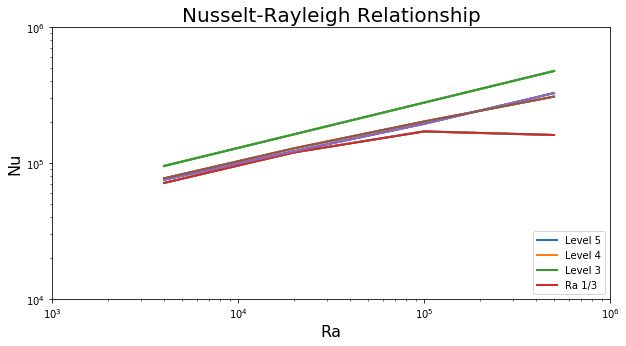

In [12]:
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,10)
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter
# Remember to plot it in the notebook.
%matplotlib inline
# Hand assign these arrays and take the transpose or else it will try to plot by columns.
xdata = np.array([4000, 20000, 100000, 500000])                     # Rayleigh Number
ydata = np.array ([ 
        [9.524e+04,1.629e+05,2.785e+05,4.762e+05],        # Rayleigh 1/3
        [7.142e+04,1.198e+05,1.71e+05,1.61e+05],          # Refinement level 3
        [7.544e+04,1.222e+05,1.945e+05,3.278e+05],        # Refinement level 4
        [7.719e+04,1.284e+05,2.023e+05,3.086e+05] ]).T      # Refinement level 5

fig = plt.figure( figsize = (10,5))
ax = fig.add_subplot(111)
# now let's trying plotting a simple log-log x-y graph looping over the array
for graph in ydata:
    ax.loglog(xdata,ydata,linewidth=2.0)

ax.set_xlabel('Ra',fontsize=16)
ax.set_ylabel('Nu',fontsize=16)
ax.set_title('Nusselt-Rayleigh Relationship',fontsize=20)
ax.legend(['Level 5', 'Level 4','Level 3','Ra 1/3'], loc='lower right')

ax.set_xlim([1000, 1000000])
ax.set_ylim([1.0e+04, 1.0e+06])

plt.show()    

**Exercise:** Do we observe the correct Rayleigh-Nusselt this in our simulation?

**Exercise:** Which is better, REFINEMENT=3 or REFINEMENT=5?

**Exercise:** Why?

**Exercise:** Should we always pick the largest possible refinement value?

### Time to Play

Below is a few suggested exercises for you to play in this notebook on your own. 

Cut and paste from above to the code cell below.

> **Exercise:** Plot the Nusselt number over time.

> **Exercise:** Change the geometry.

> **Exercise:** Change boundary conditions.

> **Exercise:** Try another cookbook!

## 4.0 Good Things to Know


### 4.1 Governing Equations
ASPECT solves a system of equations in a 2- or 3-dimensional
domain $\Omega$ that describes the motion of a highly viscous fluid driven
by differences in the gravitational force due to a density that depends on
the temperature. 

Specifically, we consider the following set of equations for velocity $\mathbf
u$, pressure $p$ and temperature $T$, as well as a set of advected quantities
$c_i$ that we call <em>compositional fields</em>:

(1) Momentum equation:
\begin{align}
    -\nabla \cdot \left[2\eta \left(\varepsilon(\mathbf u)
                                  - \frac{1}{3}(\nabla \cdot \mathbf u)\mathbf 1\right)
                \right] + \nabla p &=
  \rho \mathbf g
\end{align}
 (2) Conservation of mass:
\begin{align}
    \nabla \cdot (\rho \mathbf u) &= 0
\end{align}
 (3) Conservation of energy:
\begin{align}
\rho C_p \left(\frac{\partial T}{\partial t} + \mathbf u\cdot\nabla T\right)
  - \nabla\cdot k\nabla T
  &=
  \rho H
  \notag
  \\
  &\quad
  +
  2\eta
  \left(\varepsilon(\mathbf u) - \frac{1}{3}(\nabla \cdot \mathbf u)\mathbf 1\right)
  :
  \left(\varepsilon(\mathbf u) - \frac{1}{3}(\nabla \cdot \mathbf u)\mathbf 1\right)
  \\
  &\quad
  +\alpha T \left( \mathbf u \cdot \nabla p \right)
  \notag
  \\
  &\quad
  + \rho T \Delta S \left(\frac{\partial X}{\partial t} + \mathbf u\cdot\nabla X\right)
  &
  & \textrm{in $\Omega$}
\end{align}
(4) Advection of compositional fields:
\begin{align}
\frac{\partial c_i}{\partial t} + \mathbf u\cdot\nabla c_i
  &=
  q_i
  &
  & \textrm{in $\Omega$},
  i=1\ldots C
\end{align}

In this set of equations, (1) and (2)
represent the compressible Stokes equations in which $\mathbf u=\mathbf
u(\mathbf x,t)$ is the velocity field and $p=p(\mathbf x,t)$ the pressure
field. Both fields depend on space $\mathbf x$ and time $t$. Fluid flow is
driven by the gravity force that acts on the fluid that is proportional to
both the density of the fluid and the strength of the gravitational pull.

Coupled to this Stokes system is equation (3) for the
temperature field $T=T(\mathbf x,t)$ that contains heat conduction terms as
well as advection with the flow velocity $\mathbf u$. The right hand side
terms of this equation correspond to:
* internal heat production, e.g. radioactive decay; 
* shear heating;
* adiabatic heating (compression of material); and
* latent heat (phase change).

Equation (4) describes
the evolution of additional fields that are transported along with the
velocity field $\mathbf u$ and may react with each other and react to other
features of the solution but do not diffuse. We call these fields, $c_i$,
<em>compositional fields</em> although they can also be used for other
purposes than just tracking chemical compositions. 

### 4.2  The .prm file
example file is convection_box.prm

#### subsection Geometry model
    
ASPECT has many built in geometry models such as “box” and “shell” and "chunk". 

A box is a rectangle in 2-D and a cuboid in 3-D.

In your .prm file, 
* X extent is width
* Y extent is depth

Units of length is meter.

#### subsection Initial temperature model
ASPECT has built in initial condition models to specify the temperature initial conditions and framework for users to implement custom initial condition models.

Function lets us specify the intial temperature as a mathematical formula, with user defined constants.

In the example here, a sinusoidal perturbation of a linear temperature profile is specified.

#### subsection Boundary temperature model

The boundary temperature of your box can be specified using Top, Bottom, Left, and Right.

Temperatures are in K.

#### subsection Model settings
Each geometry model has a set of “boundary indicators” that identifies each boundary in the model.

In the 2D box model, the boundary identification is Left or 0, Right or 1, Bottom or 2, Top or 3.

In the example here:
* The temperature on the bottom and top boundaries is fixed.
* All four sides of the box have only a tangential component to the velocity (zero normal component).

You can set adiabatic, shear, or radiogenic heating in this subsection as well.

#### subsection Material model
ASPECT provides various built in material models and a framework for users to implement custom material models.

In the example here, the built in simple material model is used:
\begin{align}
  \rho( T) = \rho_0 ( 1 - \beta ( T - T_{ref})
  \eta(T) = \eta_0\epsilon^{\eta_T \Delta T/T_{ref}}
\end{align}

where $\eta_0$ is set by the VISCOSITY parameter, $\rho_0$ is the default value $3300kg/m^3$, and 
$\eta_T = 1$ (viscosity does not depend on the composition).

There are several other parameters which control reference density, temperature dependence of
viscosity, etc. These have default values shown in Section 4.3.

#### subsection Mesh refinement
Initial global refinement specifies the "grid spacing".

In the example here: 
* Intial global refinement was set to 4 corresponding to a 16x16 grid. Setting refinement to 3 corresponds to an 8x8 grid; Setting refinement to 16 correspond to a 32x32 grid.  
* Adaptive mesh refinement is turned off.

#### subsection Postprocess
This section of the parameter file specifies how to analyze the data that has been generated.

In the example here:
* Post processors include velocity, temperature, heat flux statistics, and visualization.
* Graphical output is generated every 0.01 years (simulation time!)


### 4.3 Default Values

ASPECT uses SI units (MKS):
* $t$ time is internally calculated in seconds. Exported in years.
* $\bf{u}$ velocity $m/s$
* $p$ pressure Pa
* $T$ temperature K
* $\epsilon(\bf{u})$ strain rate $1/s$
* $\eta$ viscosity $Pa \cdot s$
* $\rho$ density $kg/m^3$
* g gravity $m/s^2$
* $C_p$ specific heat capacity $J/kg \cdot K$
* $\kappa$ thermal conductivity $W/m \cdot K$
* $\it{H}$ intrinsic specific heat production $W/kg$

Default values:
* $\rho_0 = 3300$
* $g=9.8$
* $\alpha = 2 \times 10^{-5}$
* $\Delta T = 3600-273 = 3327 $
* $D = 3 \times 10^6$
* $k = 4.7$
* $c_p = 1250 $
* $\kappa = {k \over {\rho_0c_p}} = 1.1394 \times 10^{-6} $



## ! LAST THING ! Reproducibility and Credit

Support reproducibility of your results.  

You can do this in your publications by citing:
* the version of the code used,
* where the code can be found, and
* input and output files repository.  

> Consult your institution and/or publisher for repository recommendations.  
> Still do not know what to use? Check out zenodo.org.  CIG maintains a Zenodo Community - Computational Infrastructure for Geodynamics.  Join the community to improve discoverability of your work.

Many researchers have contributed a large amount of time and effort to developing ASPECT for the community.  Help them in their careers by citing ASPECT.  

For the latest citation information, go to:
> http://aspect.dealii.org/publications.html

For full citation and attribution information see:
> https://geodynamics.org/abc

## A. Running in Docker
A. Install Docker

B. Download the docker image
> docker pull tjhei/aspect-jupyter

1. Start Docker
2. In a terminal window, navigate to directory where your model input is located:
>	cd my_directory/ModelInput
3. Load the Jupyter extension for widgets:
>jupyter nbextension enable widgetsnbextension --py --sys-prefix
4. Spin up Timo’s container with Jupyter notebooks and map your current working directory as input: 
>	docker run -it -v "$(pwd):/home/dealii/aspect/model_input:ro" -d -p 8888:8888 --name tmpnb-aspect-jupyter tjhei/aspect-jupyter start-notebook.sh --NotebookApp.token=' ' 
5. In a browser, type:
>	http://localhost:8888/tree?
6. Upload this notebook and the image files.

Remember you are now running in a Docker container and NOT your desktop.

** Common problems: **

	unexpected error address already in use.
	change your local host address 8887:8888
	change this to 8887 in step 5

You have to remove (or rename) that container to be able to reuse that name.
Easiest solution (somewhat heavy handed) stop your container, prune, and check.

> docker stop CONTAINER_ID

> docker container prune 

> docker ps -a
        
 ## B. Packages install
 
The heat flux slider requires the installation of two additional packages.

** Adding Jupyter widgets **

You should have added this in Step 3 above:
> jupyter nbextension enable widgetsnbextension --py --sys-prefix

** installing tables **
> conda install tables
 